In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls ./drive/MyDrive/Goruntu\ Isleme\ Odevi/annotations/

captions_train2017.json  instances_train2017.json  person_keypoints_train2017.json
captions_val2017.json	 instances_val2017.json    person_keypoints_val2017.json


# COCO Veri setini yüklemek
Pycocotools kütüphanesi kullanılarak COCO veri setinin yüklenmesi için aşağıdaki örnek koddan faydalanılmıştır.

- COCO API Demo Notebook: [pycocoDemo.ipynb](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb)

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
annFile='./drive/MyDrive/Goruntu Isleme Odevi/annotations/instances_val2017.json'

In [ ]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.32s)
creating index...
index created!


In [ ]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food indoor furniture vehicle electronic appliance sports person accessory kitchen outdoor animal


In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

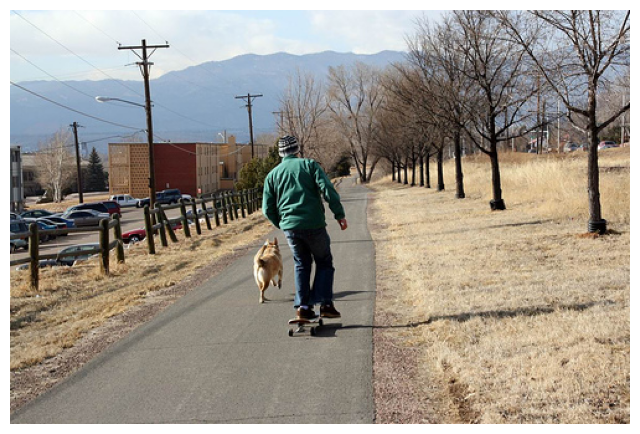

In [ ]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

# Pre-trained YOLO v3 Modelini yüklemek
YOLO v3 modeli kullanılarak resimde nesne tespit etmek için aşağıdaki örnek koddan yararlanılmıştır.

- YOLO Object Detection Demo: [YOLO.ipynb](https://github.com/Garima13a/YOLO-Object-Detection/blob/master/YOLO.ipynb)

In [ ]:
import cv2
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath("./drive/MyDrive/Goruntu Isleme Odevi/"))

from utils import *
from darknet import Darknet

In [ ]:
print(os.listdir('./drive/MyDrive/Goruntu Isleme Odevi/weights'))

# Set the location and name of the cfg file
cfg_file = './drive/MyDrive/Goruntu Isleme Odevi/cfg/yolov3.cfg'

# Set the location and name of the pre-trained weights file
weight_file = './drive/MyDrive/Goruntu Isleme Odevi/weights/yolov3.weights'

# Set the location and name of the COCO object classes file
namesfile = './drive/MyDrive/Goruntu Isleme Odevi/data/coco.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

['yolov3.weights', '.ipynb_checkpoints']



In [ ]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

In [ ]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = I # cv2.imread('./images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

Output hidden; open in https://colab.research.google.com to view.



It took 4.756 seconds to detect the objects in the image.

Number of Objects Detected: 4 

Objects Found and Confidence Level:

1. person: 1.000000
2. dog: 0.988668
3. car: 0.999970
4. skateboard: 0.999999


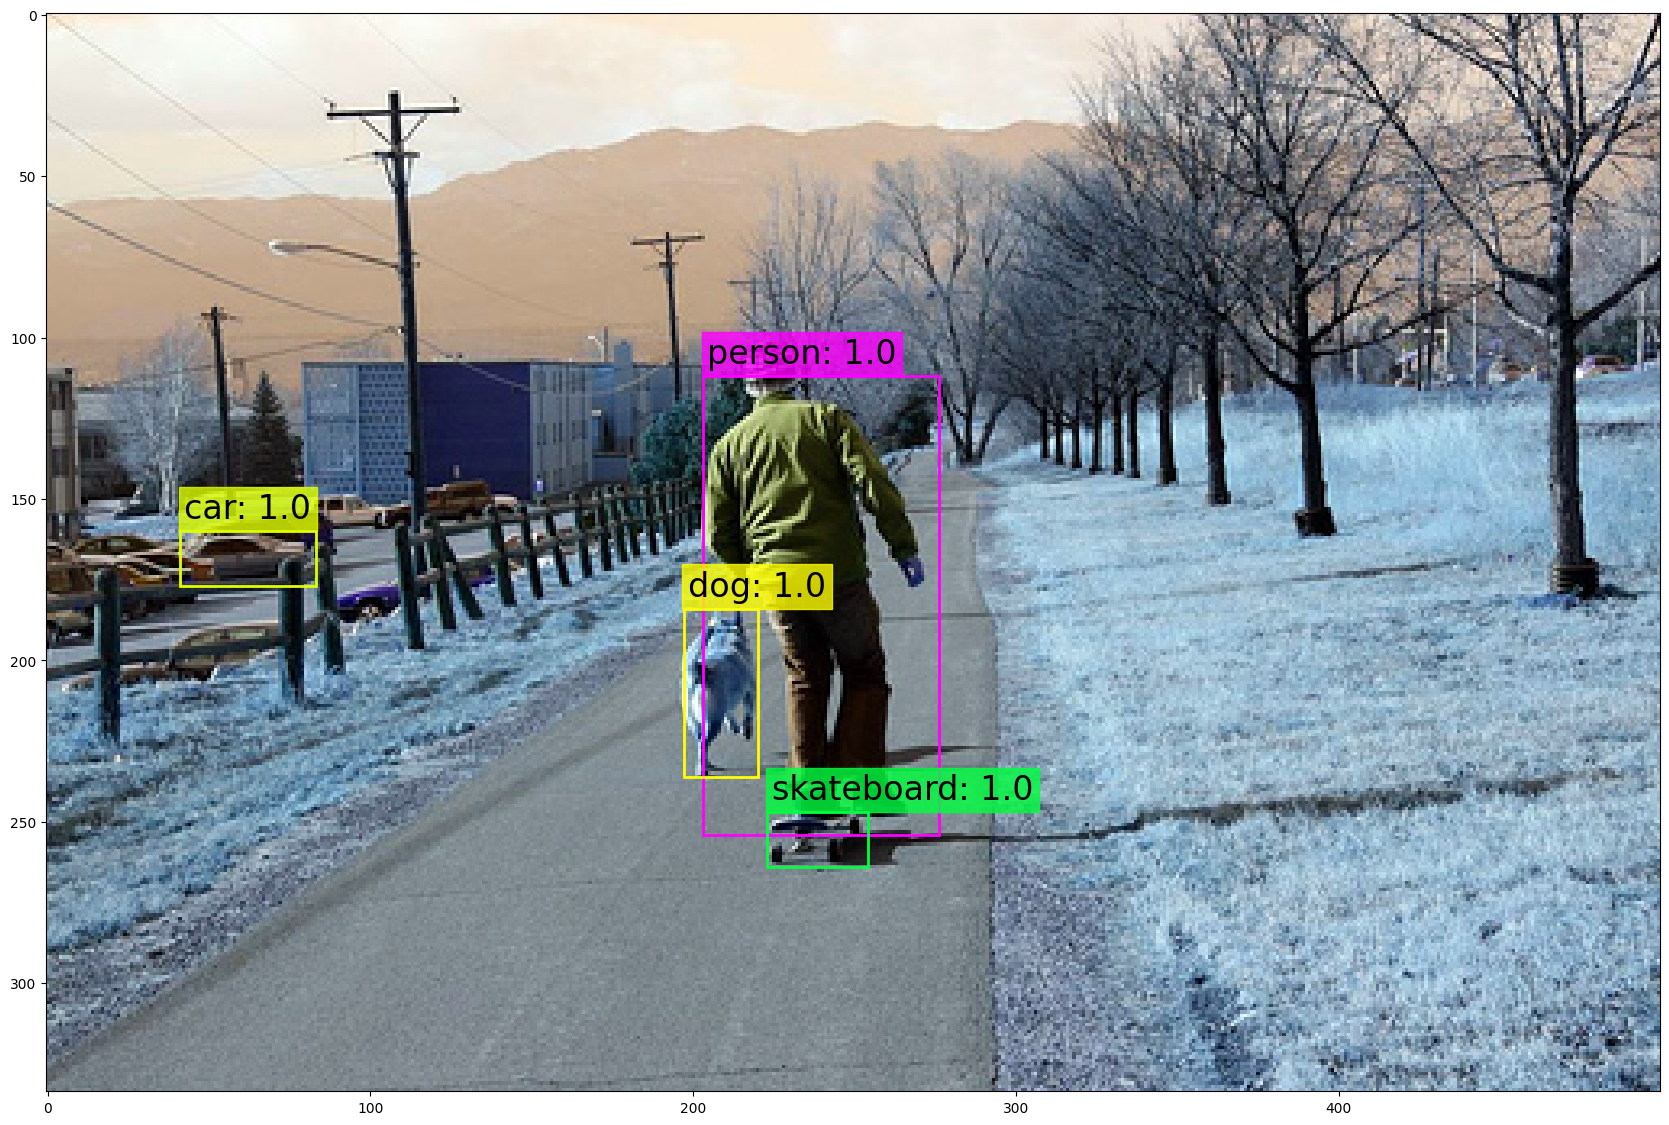

In [ ]:
# Set the NMS threshold
nms_thresh = 0.6

# Set the IOU threshold
iou_thresh = 0.4

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)

# Görsel Veri Setini Oluşturmak

COCO veri setinden rastgele seçilecek görsellerle yeni bir Dataframe oluşturuyoruz.

Veri setinde kaç tane resim olmasını istiyorsanız, image_count değişkenini ona göre güncelleyiniz.

```
image_count = 500 # COCO veri setinden kaç tane resim çekilecek?
```

##### **Zenginleştirme işlemlerinden sonra veri seti boyutunun 5 katına çıkacağını unutmayın! YOLO'nun her bir görseli işlemesi ortalama 1.5 saniye sürmektedir. Dolayısıyla görsel sayısı arttıkça işlem süresi uzayacaktır.**


In [1]:
import random
import pandas as pd

image_count = 500 # COCO veri setinden kaç tane resim çekilecek?

# Create an empty DataFrame
columns = ["Image", "ImageId", "Original Labels", "Bounding Boxes", "Detected Labels", "Faster R-CNN Labels", "YOLO Boxes", "Faster R-CNN Boxes"]
df = pd.DataFrame(columns=columns)

# Get all images containing the "person" category
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)

# Randomly select up to 50 image IDs
random_imgIds = random.sample(imgIds, min(image_count, len(imgIds)))  # Avoid exceeding available images

# Load and display 50 random images
for imgId in random_imgIds:
    img = coco.loadImgs(imgId)[0]
    I = io.imread(img['coco_url'])

    # Load annotations for the image
    annIds = coco.getAnnIds(imgIds=imgId, iscrowd=None)
    anns = coco.loadAnns(annIds)

    # Collect object labels
    object_labels = [coco.loadCats(ann['category_id'])[0]['name'] for ann in anns]

    # Fetch bounding boxes
    bboxes = [ann['bbox'] for ann in anns]

    # Append a row
    df.loc[len(df)] = {
        "Image": I,
        "ImageId": imgId,
        "Original Labels": object_labels,
        "Bounding Boxes": bboxes,
        "Detected Labels": [],
        "Faster R-CNN Labels": [],
        "YOLO Boxes": [],
        "Faster R-CNN Boxes": []
        }


df

NameError: name 'coco' is not defined

In [ ]:
!nvidia-smi

# Single Shot Detector ile nesne tespiti (Orijinal veri seti)

Bu kod, Single Shot Detector modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- İlk olarak, modelin çalışabilmesi için cihazımı (GPU veya CPU) belirliyorum. Eğer GPU varsa, GPU kullanılacak, yoksa CPU'ya geçilecek.
- Sonra, SSD modelini yüklüyorum. Bu model zaten önceden eğitilmiş olarak geliyor, yani COCO veri seti üzerinde eğitimli.
- COCO veri setinde bulunan etiketlerin bir listesini tanımlıyorum. Bu listede tüm nesne sınıfları yer alıyor, örneğin 'person', 'dog', 'car' gibi.
- Görselleri modele sokmadan önce bazı işlemler yapmam gerekiyor: Bunu bir `preprocess_image()` fonksiyonunda topladım. Görseli RGB formatına çevirip, boyutları 300x300'e küçültüp, tensöre dönüştürüyorum ve modelin gereksinimlerine göre normalize ediyorum.
- Daha sonra, modelden tahminleri almak için `predict()` fonksiyonu kullanılıyor. Bu fonksiyon, SSD modelini çalıştırıp, tahmin edilen nesnelerin kutularını, doğruluk skorlarını ve etiketlerini elde etmemi sağlıyor.
- Her bir görsel için tahminleri alıp, bunları dataframe'imdeki ilgili sütunlarda saklıyorum. Bu tahminler, modelin tespit ettiği etiketler ve bounding box'lar olacak.
- Son olarak, tahmin edilen etiketler ve kutular dataframe'e ekleniyor ve her bir görsel için SSD'nin tespit ettiği nesneleri takip edebilmem sağlanıyor.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `SSD Labels`, `SSD Boxes`

In [ ]:
import torch
from torchvision.models.detection import ssd300_vgg16
from torchvision import transforms

objects_df = df.copy() # Dataframe'in orijinalini korumak adına yeni bir df objesine kopyalıyoruz

# Initialize SSD model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ssd300_vgg16(pretrained=True)
model.eval().to(device)

# Define class labels (COCO classes used for SSD pre-trained model)
CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

# Preprocessing function
def preprocess_image(image):
    """Preprocess an image for SSD input."""

    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((300, 300)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

# Prediction function
def predict(image_tensor, model, threshold=0.5):
    """Perform prediction using the SSD model."""
    with torch.no_grad():
        predictions = model(image_tensor)[0]

    # Extract boxes, scores, and labels above the threshold
    boxes = predictions['boxes']
    scores = predictions['scores']
    labels = predictions['labels']

    # Filter results
    mask = scores >= threshold
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    return boxes, scores, labels

# Iterate through the dataframe
ssd_labels = []
ssd_boxes = []

for index, row in objects_df.iterrows():
    # Fetch the image directly from the dataframe
    image = row['Image']

    # Preprocess the image
    image_tensor = preprocess_image(image)
    image_tensor = image_tensor.to(device)

    # Predict
    boxes, scores, labels = predict(image_tensor, model)

    # Save predictions
    ssd_labels.append([CLASSES[label] for label in labels])
    ssd_boxes.append(boxes.cpu().numpy().tolist())

# Add predictions back to the dataframe
objects_df["SSD Labels"] = ssd_labels
objects_df["SSD Boxes"] = ssd_boxes

objects_df

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ImageId,Original Labels,Bounding Boxes,Detected Labels,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes
0,"[[[96, 107, 125], [93, 105, 117], [141, 150, 1...",343706,"[cell phone, person]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",[],[],[],[],"[person, cell phone]","[[22.29608154296875, 0.0, 258.1026611328125, 2..."
1,"[[[72, 56, 40], [70, 53, 37], [73, 54, 39], [7...",25394,"[person, wine glass, wine glass, bottle, bottl...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....",[],[],[],[],"[person, wine glass, cup, wine glass, dining t...","[[28.023643493652344, 61.523887634277344, 172...."
2,"[[[3, 3, 3], [2, 2, 2], [0, 0, 0], [4, 4, 4], ...",341828,"[cell phone, person, sandwich]","[[338.7, 259.06, 101.64, 142.99], [0.0, 4.13, ...",[],[],[],[],"[person, cell phone]","[[0.0, 0.0, 299.763427734375, 300.0], [163.170..."
3,"[[[228, 238, 239], [228, 238, 239], [226, 238,...",263403,"[person, surfboard]","[[334.9, 61.02, 79.58, 122.72], [389.06, 79.77...",[],[],[],[],[person],"[[157.46868896484375, 49.70682907104492, 198.3..."
4,"[[[104, 138, 176], [102, 137, 175], [102, 140,...",161128,"[car, person, car, bus, fire hydrant, person, ...","[[269.3, 389.8, 47.03, 26.51], [97.41, 386.98,...",[],[],[],[],"[car, car]","[[0.0, 237.04095458984375, 36.549407958984375,..."
...,...,...,...,...,...,...,...,...,...,...
495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....",[],[],[],[],"[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216..."
496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...",[],[],[],[],"[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8..."
497,"[[[142, 101, 47], [144, 103, 47], [140, 100, 4...",460333,"[bed, chair, chair, person]","[[146.37, 238.92, 283.05, 120.54], [385.95, 28...",[],[],[],[],"[person, chair, chair, bed]","[[139.82952880859375, 133.28683471679688, 187...."
498,"[[[144, 154, 156], [141, 151, 153], [142, 150,...",123480,"[toothbrush, toothbrush, person, cell phone]","[[212.22, 313.99, 28.81, 27.92], [278.9, 374.4...",[],[],[],[],[person],"[[59.182838439941406, 75.66661071777344, 188.6..."


# ResNet50 Modeli ile Nesne Tespiti (Orijinal Veri Seti)

Bu kod, ResNet50 modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- İlk olarak, modelin çalışabilmesi için cihazımı (GPU veya CPU) belirliyorum. Eğer GPU varsa, GPU kullanılacak, yoksa CPU'ya geçilecek.
- Sonra, ResNet50 modelini yüklüyorum. Bu model zaten önceden eğitilmiş olarak geliyor, yani COCO veri seti üzerinde eğitimli.
- COCO veri setinde bulunan etiketlerin bir listesini tanımlıyorum. Bu listede tüm nesne sınıfları yer alıyor, örneğin 'person', 'dog', 'car' gibi.
- Görselleri modele sokmadan önce bazı işlemler yapmam gerekiyor: Bunu bir `preprocess_image()` fonksiyonunda topladım. Görseli RGB formatına çevirip, boyutları 300x300'e küçültüp, tensöre dönüştürüyorum ve modelin gereksinimlerine göre normalize ediyorum.
- Daha sonra, modelden tahminleri almak için `predict()` fonksiyonu kullanılıyor. Bu fonksiyon, ResNet50 modelini çalıştırıp, tahmin edilen nesnelerin kutularını, doğruluk skorlarını ve etiketlerini elde etmemi sağlıyor.
- Her bir görsel için tahminleri alıp, bunları dataframe'imdeki ilgili sütunlarda saklıyorum. Bu tahminler, modelin tespit ettiği etiketler ve bounding box'lar olacak.
- Son olarak, tahmin edilen etiketler ve kutular dataframe'e ekleniyor ve her bir görsel için ResNet50'nin tespit ettiği nesneleri takip edebilmem sağlanıyor.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `ResNet50 Labels`, `ResNet50 Boxes`

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Initialize Faster R-CNN with ResNet-50 as the backbone
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval().to(device)

# Define class labels (COCO classes used for the pre-trained model)
CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Preprocessing function
def preprocess_image(image):
    """Preprocess an image for Faster R-CNN input."""
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

# Prediction function
def predict(image_tensor, model, threshold=0.5):
    """Perform prediction using the Faster R-CNN model."""
    with torch.no_grad():
        predictions = model(image_tensor)[0]

    # Extract boxes, scores, and labels above the threshold
    boxes = predictions['boxes']
    scores = predictions['scores']
    labels = predictions['labels']

    # Filter results
    mask = scores >= threshold
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    return boxes, scores, labels

# Iterate through the dataframe
resnet50_labels = []
resnet50_boxes = []

for index, row in objects_df.iterrows():
    # Fetch the image directly from the dataframe
    image = row['Image']

    # Preprocess the image
    image_tensor = preprocess_image(image)
    image_tensor = image_tensor.to(device)

    # Predict
    boxes, scores, labels = predict(image_tensor, model)

    # Save predictions
    resnet50_labels.append([CLASSES[label] for label in labels])
    resnet50_boxes.append(boxes.cpu().numpy().tolist())

# Add predictions back to the dataframe
objects_df["ResNet50 Labels"] = resnet50_labels
objects_df["ResNet50 Boxes"] = resnet50_boxes

objects_df


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ImageId,Original Labels,Bounding Boxes,Detected Labels,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes
0,"[[[96, 107, 125], [93, 105, 117], [141, 150, 1...",343706,"[cell phone, person]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",[],[],[],[],"[person, cell phone]","[[22.29608154296875, 0.0, 258.1026611328125, 2...","[person, teddy bear]","[[13.522665023803711, 10.840009689331055, 476...."
1,"[[[72, 56, 40], [70, 53, 37], [73, 54, 39], [7...",25394,"[person, wine glass, wine glass, bottle, bottl...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....",[],[],[],[],"[person, wine glass, cup, wine glass, dining t...","[[28.023643493652344, 61.523887634277344, 172....","[wine glass, person, bottle, bottle, bottle, b...","[[354.4150390625, 409.0589904785156, 419.11849..."
2,"[[[3, 3, 3], [2, 2, 2], [0, 0, 0], [4, 4, 4], ...",341828,"[cell phone, person, sandwich]","[[338.7, 259.06, 101.64, 142.99], [0.0, 4.13, ...",[],[],[],[],"[person, cell phone]","[[0.0, 0.0, 299.763427734375, 300.0], [163.170...","[person, cell phone]","[[5.365879058837891, 16.689876556396484, 590.1..."
3,"[[[228, 238, 239], [228, 238, 239], [226, 238,...",263403,"[person, surfboard]","[[334.9, 61.02, 79.58, 122.72], [389.06, 79.77...",[],[],[],[],[person],"[[157.46868896484375, 49.70682907104492, 198.3...","[person, surfboard]","[[334.42626953125, 61.35502624511719, 417.7291..."
4,"[[[104, 138, 176], [102, 137, 175], [102, 140,...",161128,"[car, person, car, bus, fire hydrant, person, ...","[[269.3, 389.8, 47.03, 26.51], [97.41, 386.98,...",[],[],[],[],"[car, car]","[[0.0, 237.04095458984375, 36.549407958984375,...","[car, car, person, person, truck, car, car, ca...","[[1.552911400794983, 392.4442443847656, 49.990..."
...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....",[],[],[],[],"[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433...."
496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...",[],[],[],[],"[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 607.35..."
497,"[[[142, 101, 47], [144, 103, 47], [140, 100, 4...",460333,"[bed, chair, chair, person]","[[146.37, 238.92, 283.05, 120.54], [385.95, 28...",[],[],[],[],"[person, chair, chair, bed]","[[139.82952880859375, 133.28683471679688, 187....","[person, chair, chair, bed, chair, cup, dog, c...","[[302.09222412109375, 216.8363037109375, 399.2..."
498,"[[[144, 154, 156], [141, 151, 153], [142, 150,...",123480,"[toothbrush, toothbrush, person, cell phone]","[[212.22, 313.99, 28.81, 27.92], [278.9, 374.4...",[],[],[],[],[person],"[[59.182838439941406, 75.66661071777344, 188.6...","[person, toothbrush]","[[105.26705932617188, 116.03990936279297, 406...."


# RetinaNet Modeli ile nesne tespiti (Orijinal Veri Seti)

Bu kod, RetinaNet modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- İlk olarak, modelin çalışabilmesi için cihazımı (GPU veya CPU) belirliyorum. Eğer GPU varsa, GPU kullanılacak, yoksa CPU'ya geçilecek.
- Sonra, RetinaNet modelini yüklüyorum. Bu model zaten önceden eğitilmiş olarak geliyor, yani COCO veri seti üzerinde eğitimli.
- COCO veri setinde bulunan etiketlerin bir listesini tanımlıyorum. Bu listede tüm nesne sınıfları yer alıyor, örneğin 'person', 'dog', 'car' gibi.
- Görselleri modele sokmadan önce bazı işlemler yapmam gerekiyor: Bunu bir `preprocess_image()` fonksiyonunda topladım. Görseli RGB formatına çevirip, boyutları 300x300'e küçültüp, tensöre dönüştürüyorum ve modelin gereksinimlerine göre normalize ediyorum.
- Daha sonra, modelden tahminleri almak için `predict()` fonksiyonu kullanılıyor. Bu fonksiyon, RetinaNet modelini çalıştırıp, tahmin edilen nesnelerin kutularını, doğruluk skorlarını ve etiketlerini elde etmemi sağlıyor.
- Her bir görsel için tahminleri alıp, bunları dataframe'imdeki ilgili sütunlarda saklıyorum. Bu tahminler, modelin tespit ettiği etiketler ve bounding box'lar olacak.
- Son olarak, tahmin edilen etiketler ve kutular dataframe'e ekleniyor ve her bir görsel için RetinaNet'in tespit ettiği nesneleri takip edebilmem sağlanıyor.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `RetinaNet Labels`, `RetinaNet Boxes`

In [ ]:
from torchvision.models.detection import retinanet_resnet50_fpn

# Initialize RetinaNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = retinanet_resnet50_fpn(pretrained=True)
model.eval().to(device)

# Define class labels (COCO classes used for RetinaNet pre-trained model)
CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Preprocessing function
def preprocess_image(image):
    """Preprocess an image for RetinaNet input."""
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

# Prediction function
def predict(image_tensor, model, threshold=0.5):
    """Perform prediction using the RetinaNet model."""
    with torch.no_grad():
        predictions = model(image_tensor)[0]

    # Extract boxes, scores, and labels above the threshold
    boxes = predictions['boxes']
    scores = predictions['scores']
    labels = predictions['labels']

    # Filter results
    mask = scores >= threshold
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    return boxes, scores, labels

# Iterate through the dataframe
retinanet_labels = []
retinanet_boxes = []

for index, row in objects_df.iterrows():
    # Fetch the image directly from the dataframe
    image = row['Image']

    # Preprocess the image
    image_tensor = preprocess_image(image)
    image_tensor = image_tensor.to(device)

    # Predict
    boxes, scores, labels = predict(image_tensor, model)

    # Save predictions
    retinanet_labels.append([CLASSES[label] for label in labels])
    retinanet_boxes.append(boxes.cpu().numpy().tolist())

# Add predictions back to the dataframe
objects_df["RetinaNet Labels"] = retinanet_labels
objects_df["RetinaNet Boxes"] = retinanet_boxes

# Display the updated dataframe
objects_df


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ImageId,Original Labels,Bounding Boxes,Detected Labels,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,"[[[96, 107, 125], [93, 105, 117], [141, 150, 1...",343706,"[cell phone, person]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",[],[],[],[],"[person, cell phone]","[[22.29608154296875, 0.0, 258.1026611328125, 2...","[person, teddy bear]","[[13.522665023803711, 10.840009689331055, 476....","[cell phone, person]","[[182.94395446777344, 312.9031066894531, 307.4..."
1,"[[[72, 56, 40], [70, 53, 37], [73, 54, 39], [7...",25394,"[person, wine glass, wine glass, bottle, bottl...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....",[],[],[],[],"[person, wine glass, cup, wine glass, dining t...","[[28.023643493652344, 61.523887634277344, 172....","[wine glass, person, bottle, bottle, bottle, b...","[[354.4150390625, 409.0589904785156, 419.11849...","[person, wine glass, cup, cell phone, bottle, ...","[[36.33174133300781, 141.59182739257812, 272.9..."
2,"[[[3, 3, 3], [2, 2, 2], [0, 0, 0], [4, 4, 4], ...",341828,"[cell phone, person, sandwich]","[[338.7, 259.06, 101.64, 142.99], [0.0, 4.13, ...",[],[],[],[],"[person, cell phone]","[[0.0, 0.0, 299.763427734375, 300.0], [163.170...","[person, cell phone]","[[5.365879058837891, 16.689876556396484, 590.1...",[person],"[[4.575829029083252, 16.06163787841797, 599.65..."
3,"[[[228, 238, 239], [228, 238, 239], [226, 238,...",263403,"[person, surfboard]","[[334.9, 61.02, 79.58, 122.72], [389.06, 79.77...",[],[],[],[],[person],"[[157.46868896484375, 49.70682907104492, 198.3...","[person, surfboard]","[[334.42626953125, 61.35502624511719, 417.7291...",[person],"[[333.2911682128906, 62.08669662475586, 415.79..."
4,"[[[104, 138, 176], [102, 137, 175], [102, 140,...",161128,"[car, person, car, bus, fire hydrant, person, ...","[[269.3, 389.8, 47.03, 26.51], [97.41, 386.98,...",[],[],[],[],"[car, car]","[[0.0, 237.04095458984375, 36.549407958984375,...","[car, car, person, person, truck, car, car, ca...","[[1.552911400794983, 392.4442443847656, 49.990...","[car, car, truck, person, person]","[[1.7231369018554688, 391.5788879394531, 49.36..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....",[],[],[],[],"[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 442.49..."
496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...",[],[],[],[],"[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 607.35...","[cup, dining table, chair, cake, fork, fork, p...","[[0.43162569403648376, 210.2329559326172, 78.8..."
497,"[[[142, 101, 47], [144, 103, 47], [140, 100, 4...",460333,"[bed, chair, chair, person]","[[146.37, 238.92, 283.05, 120.54], [385.95, 28...",[],[],[],[],"[person, chair, chair, bed]","[[139.82952880859375, 133.28683471679688, 187....","[person, chair, chair, bed, chair, cup, dog, c...","[[302.09222412109375, 216.8363037109375, 399.2...","[person, chair, bed, chair, bird]","[[302.7027893066406, 218.1249542236328, 399.92..."
498,"[[[144, 154, 156], [141, 151, 153], [142, 150,...",123480,"[toothbrush, toothbrush, person, cell phone]","[[212.22, 313.99, 28.81, 27.92], [278.9, 374.4...",[],[],[],[],[person],"[[59.182838439941406, 75.66661071777344, 188.6...","[person, toothbrush]","[[105.26705932617188, 116.03990936279297, 406....",[person],"[[116.1967849731

# YOLO ile nesne tespiti (Orijinal veri seti)

Bu kod, YOLO v3 modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- **Nesne Etiketi Fonksiyonu `yolo_obj_labels()`**:
  - Bu fonksiyon, YOLO modelinden dönen kutulardan (boxes) nesne etiketlerini çıkarmak için kullanılıyor.
  - Her bir kutu (box) içinde, nesne sınıfının ID'si ve güven seviyesi (confidence) bulunuyor. Eğer bu bilgiler mevcutsa, kutunun sınıf ID'si kullanılarak doğru etiketi `class_names` listesinden alıyorum ve bunları `obj_labels` listesine ekliyorum.

- **YOLO Bounding Box Formatını Çevirme `convert_to_min_format()`**:
  - YOLO'nun tespit ettiği kutu bilgisi [x_center, y_center, width, height, confidence, class_id, ...] formatında olur. Bu yüzden bunu geleneksel bounding box formatına ([x_min, y_min, width, height]) çevirmemiz gerekiyor.
  - Burada, merkez (center) ve boyut (width, height) bilgilerini kullanarak `x_min`, `y_min`, `width`, ve `height` hesaplıyorum. Bu sayede her kutu, daha yaygın kullanılan formatta oluyor.

- **Ana Döngü**:
  - İlk olarak, dataframe'deki her bir satırı işliyorum ve bu satırlardaki görseller üzerinde işlemler yapıyorum.
  - Görseli RGB formatına çeviriyorum ve ardından modeli beslemek için gereken boyutta (m.width ve m.height) yeniden boyutlandırıyorum.
  - YOLO modelinden, bu boyutlandırılmış görseldeki nesneleri tespit ediyorum (bu işlem `detect_objects()` fonksiyonuyla yapılır).
  - YOLO modelinden dönen kutuları, sınıf adlarına çevirerek `yolo_obj_labels()` fonksiyonu ile etiketler alıyorum.
  - Bu etiketleri, `all_labels` listesine ekliyorum.
  - Ayrıca, her bir nesne tespiti sonrası nesnelerin kutularını uygun formata dönüştürüp (`convert_to_min_format()`), `all_boxes` listesine ekliyorum.
  - En sonunda, bu listeleri dataframe'e ekliyor ve her satırın tespit ettiği etiket ve kutu bilgilerini saklıyorum.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `Detected Labels`, `YOLO Boxes`

In [ ]:
def yolo_obj_labels(boxes, class_names):
    obj_labels = []
    for i in range(len(boxes)):
        box = boxes[i]
        if len(box) >= 7 and class_names:
            cls_conf = box[5]
            cls_id = box[6]
            obj_labels.append(class_names[cls_id]) # , cls_conf))

    return obj_labels

# Function to convert YOLO bounding box format to [x_min, y_min, width, height]
def convert_to_min_format(boxes, image_width=m.width, image_height=m.height):
    converted_boxes = []

    for box in boxes:
        # Extract the bounding box components
        x_center, y_center, width, height, confidence, class_id, _ = box

        # Convert to the min format (x_min, y_min, width, height)
        x_min = (x_center - width / 2) * image_width
        y_min = (y_center - height / 2) * image_height
        width = width * image_width
        height = height * image_height

        converted_boxes.append([x_min.item(), y_min.item(), width.item(), height.item()])

    return converted_boxes

# Main loop to process images in the dataframe
all_labels = []  # Create a list to store labels for all rows at once
all_boxes = []

for index, row in objects_df.iterrows():
    img = np.array(row['Image'])

    # Convert the image to RGB
    original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the input size for the model
    resized_image = cv2.resize(original_image, (m.width, m.height))

    # Detection parameters
    nms_thresh = 0.6
    iou_thresh = 0.4

    # Get the boxes from the detection function
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

    # Get labels from YOLO output
    yolo_labels = yolo_obj_labels(boxes, class_names)

    # Append the detected labels to the list
    all_labels.append(yolo_labels)

    # Print the objects found and the confidence level
    print_objects(boxes, class_names)

    # Get YOLO bounding boxes
    converted_boxes = convert_to_min_format(boxes)
    all_boxes.append(converted_boxes)

    print("\n---------------------------------------------\n")

# Assign the list to the dataframe in one go
objects_df["Detected Labels"] = all_labels
objects_df["YOLO Boxes"] = all_boxes

objects_df

Streaming output truncated to the last 5000 lines.

---------------------------------------------



It took 1.126 seconds to detect the objects in the image.

Number of Objects Detected: 6 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 1.000000
3. person: 1.000000
4. person: 0.999999
5. person: 0.999998
6. car: 0.990721

---------------------------------------------



It took 1.112 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. person: 1.000000
2. baseball bat: 0.999995
3. frisbee: 0.999965

---------------------------------------------



It took 1.109 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 0.999999
3. person: 0.992105

---------------------------------------------



It took 1.117 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence L

,Image,ImageId,Original Labels,Bounding Boxes,Detected Labels,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,"[[[96, 107, 125], [93, 105, 117], [141, 150, 1...",343706,"[cell phone, person]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[person, cell phone]",[],"[[30.990188598632812, 22.2520809173584, 350.58...",[],"[person, cell phone]","[[22.29608154296875, 0.0, 258.1026611328125, 2...","[person, teddy bear]","[[13.522665023803711, 10.840009689331055, 476....","[cell phone, person]","[[182.94395446777344, 312.9031066894531, 307.4..."
1,"[[[72, 56, 40], [70, 53, 37], [73, 54, 39], [7...",25394,"[person, wine glass, wine glass, bottle, bottl...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....","[person, wine glass, cup, bottle, person, bott...",[],"[[27.03582000732422, 77.81204986572266, 227.99...",[],"[person, wine glass, cup, wine glass, dining t...","[[28.023643493652344, 61.523887634277344, 172....","[wine glass, person, bottle, bottle, bottle, b...","[[354.4150390625, 409.0589904785156, 419.11849...","[person, wine glass, cup, cell phone, bottle, ...","[[36.33174133300781, 141.59182739257812, 272.9..."
2,"[[[3, 3, 3], [2, 2, 2], [0, 0, 0], [4, 4, 4], ...",341828,"[cell phone, person, sandwich]","[[338.7, 259.06, 101.64, 142.99], [0.0, 4.13, ...","[person, cell phone]",[],"[[11.414313316345215, 2.749241828918457, 386.5...",[],"[person, cell phone]","[[0.0, 0.0, 299.763427734375, 300.0], [163.170...","[person, cell phone]","[[5.365879058837891, 16.689876556396484, 590.1...",[person],"[[4.575829029083252, 16.06163787841797, 599.65..."
3,"[[[228, 238, 239], [228, 238, 239], [226, 238,...",263403,"[person, surfboard]","[[334.9, 61.02, 79.58, 122.72], [389.06, 79.77...","[person, surfboard]",[],"[[216.53564453125, 66.17433166503906, 59.61289...",[],[person],"[[157.46868896484375, 49.70682907104492, 198.3...","[person, surfboard]","[[334.42626953125, 61.35502624511719, 417.7291...",[person],"[[333.2911682128906, 62.08669662475586, 415.79..."
4,"[[[104, 138, 176], [102, 137, 175], [102, 140,...",161128,"[car, person, car, bus, fire hydrant, person, ...","[[269.3, 389.8, 47.03, 26.51], [97.41, 386.98,...","[car, car, truck, person]",[],"[[2.7310914993286133, 323.82330322265625, 53.5...",[],"[car, car]","[[0.0, 237.04095458984375, 36.549407958984375,...","[car, car, person, person, truck, car, car, ca...","[[1.552911400794983, 392.4442443847656, 49.990...","[car, car, truck, person, person]","[[1.7231369018554688, 391.5788879394531, 49.36..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....","[person, teddy bear, chair, sofa, tvmonitor, c...",[],"[[150.8724365234375, 139.75730895996094, 128.8...",[],"[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 442.49..."
496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...","[fork, cup, person, cake, diningtable, chair, ...",[],"[[241.4903564453125, 206.92311096191406, 107.8...",[],"[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 607.35...","[cup, dining table, chair, cake, fork, fork, p...","[[0.43162569403648376, 210.2329559326172, 78.8..."
497,"[[[142, 101, 47], [144, 103, 47], [140, 100, 4...",460333,"[bed, chair, chair, person]","[[146.37, 238.92, 283.05, 120.54], [385.95, 28...","[person, chair, bed, chair]",[],"[[201.81642150

# Faster R-CNN ile Nesne Tespiti (Orijinal veri seti)

Bu kod, Faster R-CNN modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- İlk olarak, modelin çalışabilmesi için cihazımı (GPU veya CPU) belirliyorum. Eğer GPU varsa, GPU kullanılacak, yoksa CPU'ya geçilecek.
- Sonra, Faster R-CNN modelini yüklüyorum. Bu model zaten önceden eğitilmiş olarak geliyor, yani COCO veri seti üzerinde eğitimli.
- COCO veri setinde bulunan etiketlerin bir listesini tanımlıyorum. Bu listede tüm nesne sınıfları yer alıyor, örneğin 'person', 'dog', 'car' gibi.
- Görselleri modele sokmadan önce bazı işlemler yapmam gerekiyor: Bunu bir `preprocess_image()` fonksiyonunda topladım. Görseli RGB formatına çevirip, boyutları 300x300'e küçültüp, tensöre dönüştürüyorum ve modelin gereksinimlerine göre normalize ediyorum.
- Daha sonra, modelden tahminleri almak için `predict()` fonksiyonu kullanılıyor. Bu fonksiyon, Faster R-CNN modelini çalıştırıp, tahmin edilen nesnelerin kutularını, doğruluk skorlarını ve etiketlerini elde etmemi sağlıyor.
- Her bir görsel için tahminleri alıp, bunları dataframe'imdeki ilgili sütunlarda saklıyorum. Bu tahminler, modelin tespit ettiği etiketler ve bounding box'lar olacak.
- Son olarak, tahmin edilen etiketler ve kutular dataframe'e ekleniyor ve her bir görsel için Faster R-CNN'in tespit ettiği nesneleri takip edebilmem sağlanıyor.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `R-CNN Labels`, `R-CNN Boxes`

In [ ]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image

# Modeli önceden eğitilmiş ağırlıklarla yükleyin (COCO veri setiyle eğitilmiş)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Modeli doğrulama veya test moduna al
model.eval()

############# objects_df = df.copy() # Dataframe'in orijinalini korumak adına yeni bir df objesine kopyalıyoruz

confidence_threshold = 0.6 # Confidence threshold for object detection

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

result_labels = []
result_boxes = []

for index, row in objects_df.iterrows():
    image= np.array(row['Image'])

    # Görüntüyü model için uygun hale getirmek için dönüştür
    transform = transforms.Compose([
        transforms.ToTensor(),  # Görüntüyü tensor'a dönüştür
    ])

    image_tensor = transform(image).unsqueeze(0)  # batch dim eklemek için unsqueeze

    # Eğer GPU kullanıyorsanız, model ve input tensor'u GPU'ya taşıyın
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    image_tensor = image_tensor.to(device)

    # Nesne tespiti yapmak
    with torch.no_grad():  # Gereksiz gradyan hesaplamadan kaçının
        prediction = model(image_tensor)

    # Prediction sonuçları
    boxes = prediction[0]['boxes'].cpu().numpy()  # Nesne sınır kutuları
    labels = prediction[0]['labels'].cpu().numpy()  # Etiketler
    scores = prediction[0]['scores'].cpu().numpy()  # Güven skorları

    # Confidence Threshold'a göre tespitleri filtrele
    filtered_boxes = []
    filtered_labels = []
    filtered_scores = []

    for i in range(len(scores)):
        if scores[i] >= confidence_threshold:  # Eğer güven skoru eşik değerinin üzerindeyse
            filtered_boxes.append(boxes[i])
            filtered_labels.append(COCO_INSTANCE_CATEGORY_NAMES[labels[i]])

    result_labels.append(filtered_labels)
    result_boxes.append(filtered_boxes)

    # print("Filtered labels:", filtered_labels)

# Assign the list to the dataframe in one go
objects_df["Faster R-CNN Labels"] = result_labels
objects_df["Faster R-CNN Boxes"] = result_boxes

objects_df

#####################




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ImageId,Original Labels,Bounding Boxes,Detected Labels,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,"[[[96, 107, 125], [93, 105, 117], [141, 150, 1...",343706,"[cell phone, person]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[person, cell phone]","[person, donut]","[[30.990188598632812, 22.2520809173584, 350.58...","[[3.2318351, 11.893696, 461.55396, 404.83093],...","[person, cell phone]","[[22.29608154296875, 0.0, 258.1026611328125, 2...","[person, teddy bear]","[[13.522665023803711, 10.840009689331055, 476....","[cell phone, person]","[[182.94395446777344, 312.9031066894531, 307.4..."
1,"[[[72, 56, 40], [70, 53, 37], [73, 54, 39], [7...",25394,"[person, wine glass, wine glass, bottle, bottl...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....","[person, wine glass, cup, bottle, person, bott...","[wine glass, person, bottle, dining table, bot...","[[27.03582000732422, 77.81204986572266, 227.99...","[[353.45142, 410.7311, 418.38687, 572.29004], ...","[person, wine glass, cup, wine glass, dining t...","[[28.023643493652344, 61.523887634277344, 172....","[wine glass, person, bottle, bottle, bottle, b...","[[354.4150390625, 409.0589904785156, 419.11849...","[person, wine glass, cup, cell phone, bottle, ...","[[36.33174133300781, 141.59182739257812, 272.9..."
2,"[[[3, 3, 3], [2, 2, 2], [0, 0, 0], [4, 4, 4], ...",341828,"[cell phone, person, sandwich]","[[338.7, 259.06, 101.64, 142.99], [0.0, 4.13, ...","[person, cell phone]","[person, cell phone]","[[11.414313316345215, 2.749241828918457, 386.5...","[[5.365879, 16.689877, 590.1017, 592.57764], [...","[person, cell phone]","[[0.0, 0.0, 299.763427734375, 300.0], [163.170...","[person, cell phone]","[[5.365879058837891, 16.689876556396484, 590.1...",[person],"[[4.575829029083252, 16.06163787841797, 599.65..."
3,"[[[228, 238, 239], [228, 238, 239], [226, 238,...",263403,"[person, surfboard]","[[334.9, 61.02, 79.58, 122.72], [389.06, 79.77...","[person, surfboard]","[person, surfboard]","[[216.53564453125, 66.17433166503906, 59.61289...","[[334.14505, 61.672005, 417.4964, 185.00555], ...",[person],"[[157.46868896484375, 49.70682907104492, 198.3...","[person, surfboard]","[[334.42626953125, 61.35502624511719, 417.7291...",[person],"[[333.2911682128906, 62.08669662475586, 415.79..."
4,"[[[104, 138, 176], [102, 137, 175], [102, 140,...",161128,"[car, person, car, bus, fire hydrant, person, ...","[[269.3, 389.8, 47.03, 26.51], [97.41, 386.98,...","[car, car, truck, person]","[car, car, person, person, truck, car, truck, ...","[[2.7310914993286133, 323.82330322265625, 53.5...","[[1.4465725, 391.68124, 50.054893, 439.1153], ...","[car, car]","[[0.0, 237.04095458984375, 36.549407958984375,...","[car, car, person, person, truck, car, car, ca...","[[1.552911400794983, 392.4442443847656, 49.990...","[car, car, truck, person, person]","[[1.7231369018554688, 391.5788879394531, 49.36..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....","[person, teddy bear, chair, sofa, tvmonitor, c...","[person, chair, tv, toothbrush, teddy bear, co...","[[150.8724365234375, 139.75730895996094, 128.8...","[[256.95502, 159.66046, 449.02234, 467.85483],...","[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 442.49..."
496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...","[fork, cup, person, cake, diningtable, chair, ...","[dining table, person, person, cup, cake, fork...","[[241.490356445

# Nesne Etiketlerinin Normalizasyonu
Hem COCO hem de YOLO, çıktı olarak bize nesne etiketlerinin yer aldığı bir kelime dizisi vermekte. Bu noktada, COCO’nun nesne etiketleri ile YOLO modelinin tahminlerini karşılaştırarak başarı yüzdesini ölçmemiz gerekiyor. Ancak, bu çıktıların uyumsuzluğuyla ilgili birkaç sorun bulunuyor:

* COCO’nun nesne etiketleri ile YOLO’nunkiler her zaman birebir eşleşmiyor.
* * Örneğin, uçak nesnesi için COCO “airplane” etiketini kullanırken, YOLO “aeroplane” etiketini kullanmakta.
* Her görseldeki nesne sayısı farklılık gösterdiğinden, nesne etiketlerinin sayısı da görselden görsele değişiklik gösterebilir.
* * Örneğin, bir görselde 3 nesne varken başka bir görselde 10 nesne bulunabilir. Ayrıca, aynı görsel için COCO’da 5 nesne etiketi varken, YOLO yalnızca 3 nesne tanımlamış olabilir. Bu nedenle, karşılaştırılacak çıktılar hem boyut hem de içerik açısından farklılık gösterebilir.

Netice itibariyle, doğruluk ölçümlerini yapmadan önce nesne etiketleri arasındaki farklılıkları standardize etmemiz gerekiyor (normalizasyon). Elimizde uzunlukları farklı iki kelime listesi olduğu için, doğruluğu Jaccard index kullanarak ölçeceğim.

In [ ]:
# Ölçümler için Image sütununa ihtiyacımız yok, bellekten tasarruf etmek için siliyoruz
objects_df = objects_df.drop(columns=['Image'])

# Replacing YOLO labels with COCO labels
label_map = {
    "tvmonitor": "tv",
    "aeroplane": "airplane",
    "motorbike": "motorcycle",
    "diningtable": "dining table",
}

# Fonksiyon: Detected Labels'taki etiketleri label_map'e göre değiştir
def update_labels(labels):
    return [label_map.get(label, label) for label in labels]

# "Detected Labels" sütunundaki her bir array için etiketleri güncelle
objects_df['Detected Labels'] = objects_df['Detected Labels'].apply(update_labels)

objects_df

,ImageId,Original Labels,Bounding Boxes,Detected Labels,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,343706,"[cell phone, person]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[person, cell phone]","[person, donut]","[[30.990188598632812, 22.2520809173584, 350.58...","[[3.2318351, 11.893696, 461.55396, 404.83093],...","[person, cell phone]","[[22.29608154296875, 0.0, 258.1026611328125, 2...","[person, teddy bear]","[[13.522665023803711, 10.840009689331055, 476....","[cell phone, person]","[[182.94395446777344, 312.9031066894531, 307.4..."
1,25394,"[person, wine glass, wine glass, bottle, bottl...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....","[person, wine glass, cup, bottle, person, bott...","[wine glass, person, bottle, dining table, bot...","[[27.03582000732422, 77.81204986572266, 227.99...","[[353.45142, 410.7311, 418.38687, 572.29004], ...","[person, wine glass, cup, wine glass, dining t...","[[28.023643493652344, 61.523887634277344, 172....","[wine glass, person, bottle, bottle, bottle, b...","[[354.4150390625, 409.0589904785156, 419.11849...","[person, wine glass, cup, cell phone, bottle, ...","[[36.33174133300781, 141.59182739257812, 272.9..."
2,341828,"[cell phone, person, sandwich]","[[338.7, 259.06, 101.64, 142.99], [0.0, 4.13, ...","[person, cell phone]","[person, cell phone]","[[11.414313316345215, 2.749241828918457, 386.5...","[[5.365879, 16.689877, 590.1017, 592.57764], [...","[person, cell phone]","[[0.0, 0.0, 299.763427734375, 300.0], [163.170...","[person, cell phone]","[[5.365879058837891, 16.689876556396484, 590.1...",[person],"[[4.575829029083252, 16.06163787841797, 599.65..."
3,263403,"[person, surfboard]","[[334.9, 61.02, 79.58, 122.72], [389.06, 79.77...","[person, surfboard]","[person, surfboard]","[[216.53564453125, 66.17433166503906, 59.61289...","[[334.14505, 61.672005, 417.4964, 185.00555], ...",[person],"[[157.46868896484375, 49.70682907104492, 198.3...","[person, surfboard]","[[334.42626953125, 61.35502624511719, 417.7291...",[person],"[[333.2911682128906, 62.08669662475586, 415.79..."
4,161128,"[car, person, car, bus, fire hydrant, person, ...","[[269.3, 389.8, 47.03, 26.51], [97.41, 386.98,...","[car, car, truck, person]","[car, car, person, person, truck, car, truck, ...","[[2.7310914993286133, 323.82330322265625, 53.5...","[[1.4465725, 391.68124, 50.054893, 439.1153], ...","[car, car]","[[0.0, 237.04095458984375, 36.549407958984375,...","[car, car, person, person, truck, car, car, ca...","[[1.552911400794983, 392.4442443847656, 49.990...","[car, car, truck, person, person]","[[1.7231369018554688, 391.5788879394531, 49.36..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,92091,"[tv, chair, chair, couch, person, teddy bear, ...","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....","[person, teddy bear, chair, sofa, tv, chair]","[person, chair, tv, toothbrush, teddy bear, co...","[[150.8724365234375, 139.75730895996094, 128.8...","[[256.95502, 159.66046, 449.02234, 467.85483],...","[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 442.49..."
496,54605,"[dining table, fork, fork, cake, cup, cup, cha...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...","[fork, cup, person, cake, dining table, chair,...","[dining table, person, person, cup, cake, fork...","[[241.4903564453125, 206.92311096191406, 107.8...","[[12.719549, 173.09764, 611.4084, 611.1836], [...","[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 607.35...","[cup, dining table, chair, cake, fork, fork, p...","[[0.43162569403648376, 210.232

# Bounding Box Normalizasyonu

Intersection over Union hesabı yapmadan önce, verilen bounding box değerlerinin formatını dönüştürmemiz gerekiyor. Başlangıçta, her bir kutu, sol üst köşe koordinatları ve genişlik-yükseklik bilgileri (x_min, y_min, width, height) şeklinde tanımlanır. Fonksiyon, bu formatı [x_min, y_min, x_max, y_max] formatına dönüştürür. Bunu yapmak için, x_max değerini x_min + width ve y_max değerini y_min + height olarak hesaplar. Bu dönüşüm, tüm bounding box'lar için tekrarlanır, böylece her bir kutunun sağ alt köşe koordinatları elde edilir. Son olarak, bu dönüşüm her bir etiketli veri kümesi (örneğin, YOLO, Faster R-CNN) için uygulanır.

In [ ]:
def convert_to_xyxy(boxes):
    """Convert boxes in [x_min, y_min, width, height] format to [x_min, y_min, x_max, y_max]."""

    # Handle the case where 'boxes' is an empty array
    if len(boxes) == 0:
        return boxes  # Return the empty array as-is

    boxes = np.array(boxes)

    converted = boxes.copy()

    converted[:, 2] = boxes[:, 0] + boxes[:, 2]  # x_max = x_min + width
    converted[:, 3] = boxes[:, 1] + boxes[:, 3]  # y_max = y_min + height
    return converted

# "" sütunundaki her bir array için etiketleri güncelle
objects_df['Bounding Boxes'] = objects_df['Bounding Boxes'].apply(convert_to_xyxy)
objects_df['YOLO Boxes'] = objects_df['YOLO Boxes'].apply(convert_to_xyxy)
objects_df['Faster R-CNN Boxes'] = objects_df['Faster R-CNN Boxes'].apply(convert_to_xyxy)
objects_df['SSD Boxes'] = objects_df['SSD Boxes'].apply(convert_to_xyxy)
objects_df['ResNet50 Boxes'] = objects_df['ResNet50 Boxes'].apply(convert_to_xyxy)
objects_df['RetinaNet Boxes'] = objects_df['RetinaNet Boxes'].apply(convert_to_xyxy)

objects_df

,ImageId,Original Labels,Bounding Boxes,Detected Labels,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,343706,"[cell phone, person]","[[179.21, 313.78, 310.31, 399.39], [0.0, 2.3, ...","[person, cell phone]","[person, donut]","[[30.990188598632812, 22.2520809173584, 381.57...","[[3.2318351, 11.893696, 464.7858, 416.72464], ...","[person, cell phone]","[[22.29608154296875, 0.0, 280.39874267578125, ...","[person, teddy bear]","[[13.522665023803711, 10.840009689331055, 490....","[cell phone, person]","[[182.94395446777344, 312.9031066894531, 490.3..."
1,25394,"[person, wine glass, wine glass, bottle, bottl...","[[41.99, 133.51, 287.84, 552.3], [355.2, 409.6...","[person, wine glass, cup, bottle, person, bott...","[wine glass, person, bottle, dining table, bot...","[[27.03582000732422, 77.81204986572266, 255.03...","[[353.45142, 410.7311, 771.83826, 983.0211], [...","[person, wine glass, cup, wine glass, dining t...","[[28.023643493652344, 61.523887634277344, 200....","[wine glass, person, bottle, bottle, bottle, b...","[[354.4150390625, 409.0589904785156, 773.53353...","[person, wine glass, cup, cell phone, bottle, ...","[[36.33174133300781, 141.59182739257812, 309.2..."
2,341828,"[cell phone, person, sandwich]","[[338.7, 259.06, 440.34, 402.05], [0.0, 4.13, ...","[person, cell phone]","[person, cell phone]","[[11.414313316345215, 2.749241828918457, 397.9...","[[5.365879, 16.689877, 595.4676, 609.2675], [3...","[person, cell phone]","[[0.0, 0.0, 299.763427734375, 300.0], [163.170...","[person, cell phone]","[[5.365879058837891, 16.689876556396484, 595.4...",[person],"[[4.575829029083252, 16.06163787841797, 604.23..."
3,263403,"[person, surfboard]","[[334.9, 61.02, 414.47999999999996, 183.74], [...","[person, surfboard]","[person, surfboard]","[[216.53564453125, 66.17433166503906, 276.1485...","[[334.14505, 61.672005, 751.6415, 246.67755], ...",[person],"[[157.46868896484375, 49.70682907104492, 355.8...","[person, surfboard]","[[334.42626953125, 61.35502624511719, 752.1554...",[person],"[[333.2911682128906, 62.08669662475586, 749.08..."
4,161128,"[car, person, car, bus, fire hydrant, person, ...","[[269.3, 389.8, 316.33000000000004, 416.31], [...","[car, car, truck, person]","[car, car, person, person, truck, car, truck, ...","[[2.7310914993286133, 323.82330322265625, 56.2...","[[1.4465725, 391.68124, 51.501465, 830.7965], ...","[car, car]","[[0.0, 237.04095458984375, 36.549407958984375,...","[car, car, person, person, truck, car, car, ca...","[[1.552911400794983, 392.4442443847656, 51.543...","[car, car, truck, person, person]","[[1.7231369018554688, 391.5788879394531, 51.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,92091,"[tv, chair, chair, couch, person, teddy bear, ...","[[181.84, 127.62, 328.65999999999997, 232.6600...","[person, teddy bear, chair, sofa, tv, chair]","[person, chair, tv, toothbrush, teddy bear, co...","[[150.8724365234375, 139.75730895996094, 279.6...","[[256.95502, 159.66046, 705.97736, 627.51526],...","[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 318.4277...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 689....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 692.79..."
496,54605,"[dining table, fork, fork, cake, cup, cup, cha...","[[4.12, 22.12, 612.0, 605.3], [319.79, 311.55,...","[fork, cup, person, cake, dining table, chair,...","[dining table, person, person, cup, cake, fork...","[[241.4903564453125, 206.92311096191406, 349.3...","[[12.719549, 173.09764, 624.1279, 784.28125], ...","[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 372.1...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 614.95...","[cup, dining table, chair, cake, fork, fork, p...","[[0.43162569403648376, 210.232

# Performans Ölçümü (Orijinal veri seti)
Jaccard's Index, iki veri kümesi arasındaki benzerliği ölçmek için kullanılan bir metriktir. Kesişim kümesinin (ortak elemanların) birleşim kümesine (tüm elemanların) oranı olarak hesaplanır. Özellikle metin, resim veya veri kümeleri arasında benzerlik analizi yapmakta yaygınca kullanılır.

Aynı yöntemi kullanan bizim algoritmamız ise aşağıdaki gibi çalışıyor:

1. YOLO Modelinin verdiği nesne etiketleri, COCO'daki karşılıklarıyla eşleştirilmek için bir sözlük `label_map` oluşturulur.
2. Modelin tespit ettiği nesne etiketlerini içeren sütunlar, label_map sözlüğüne göre güncellenir. (Normalizasyon)
3. Tüm modellerin etiketleri (YOLO, Faster R-CNN, SSD, ResNet50, RetinaNet) orijinal etiketlerle Jaccard's Index tekniği kullanılarak karşılaştırılır. Diziler aynı etiketi birden fazla kez içerebileceği için, Jaccard's Index hesaplanırken her unique etiketin görülme sıklığı da baz alınmalıdır. Yani örneğin 5 tane bardak içeren bir görselde model 3 tane bardak tespit etmişse, modelin doğruluk oranı ⅗ olarak hesaplanmalıdır.

Ek olarak, bounding box'ların başarısını ölçmek için Intersection over Union yöntemi kullanılır.
1. `compute_iou()` fonksiyonu iki kutu arasındaki IoU değerini hesaplar.
2. `compute_ious()` fonksiyonu ise tüm kutu çiftleri için IoU matrisi oluşturur.
3. Bu matrisi kullanarak `iou_accuracy()` fonksiyonu True Positive, False Positive ve False Negative sayılarak IoU başarısı hesaplanır. Bu işlemler, her modelin IoU başarısını değerlendirerek, tahminlerin doğruluğu hakkında bilgi verir.

Sonuç olarak, her bir modelin (YOLO, Faster R-CNN, SSD, ResNet50, RetinaNet) performansını ifade eden aşağıdaki metrikler hesaplanıp yazdırılır.
* Jaccard Index
* Precision
* Recall
* Intersection over Union

In [ ]:
from collections import Counter

# Function to calculate Jaccard Similarity Index with duplicates
def jaccard_index(array_1, array_2):
    # Count the frequency of each element in both arrays
    counter_1 = Counter(array_1)
    counter_2 = Counter(array_2)

    # Calculate intersection count (sum of minimum frequencies of common elements)
    intersection_count = sum(min(counter_1[element], counter_2[element]) for element in counter_1 if element in counter_2)

    # Calculate union count (sum of maximum frequencies of all elements in both arrays)
    union_count = sum(max(counter_1[element], counter_2[element]) for element in set(array_1 + array_2))

    # Return Jaccard Similarity Index
    return intersection_count / union_count

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (YOLO)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['Detected Labels']), axis=1)

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (R-CNN)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['Faster R-CNN Labels']), axis=1)

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (SSD)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['SSD Labels']), axis=1)

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (ResNet50)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['ResNet50 Labels']), axis=1)

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (RetinaNet)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['RetinaNet Labels']), axis=1)



In [ ]:
# Function to calculate Precision and Recall
def precision_recall(array_1, array_2):
    # Count the frequency of each element in both arrays
    counter_1 = Counter(array_1)
    counter_2 = Counter(array_2)

    # Calculate intersection count (sum of minimum frequencies of common elements)
    intersection_count = sum(min(counter_1[element], counter_2[element]) for element in counter_1 if element in counter_2)

    # Precision: Intersection count / Number of predicted labels
    precision = intersection_count / len(array_2) if len(array_2) > 0 else 0

    # Recall: Intersection count / Number of true labels
    recall = intersection_count / len(array_1) if len(array_1) > 0 else 0

    return precision, recall

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (YOLO)', 'Recall (YOLO)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['Detected Labels'])), axis=1)

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (R-CNN)', 'Recall (R-CNN)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['Faster R-CNN Labels'])), axis=1)

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (SSD)', 'Recall (SSD)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['SSD Labels'])), axis=1)

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (ResNet50)', 'Recall (ResNet50)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['ResNet50 Labels'])), axis=1)

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (RetinaNet)', 'Recall (RetinaNet)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['RetinaNet Labels'])), axis=1)


In [ ]:
def compute_iou(box1, box2):
    """Compute IoU between two boxes in [x_min, y_min, x_max, y_max] format."""
    # Intersection
    x_min = max(box1[0], box2[0])
    y_min = max(box1[1], box2[1])
    x_max = min(box1[2], box2[2])
    y_max = min(box1[3], box2[3])

    inter_width = max(0, x_max - x_min)
    inter_height = max(0, y_max - y_min)
    intersection = inter_width * inter_height

    # Areas
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Union
    union = area_box1 + area_box2 - intersection

    # IoU
    return intersection / union if union > 0 else 0

def compute_ious(boxes_1, boxes_2):
    """Compute IoU matrix for all pairs of boxes in `boxes_1` and `boxes_2`."""
    ious = np.zeros((len(boxes_1), len(boxes_2)))
    for i, b1 in enumerate(boxes_1):
        for j, b2 in enumerate(boxes_2):
            ious[i, j] = compute_iou(b1, b2)
    return ious

def iou_accuracy(iou_matrix):
    # IoU threshold (e.g., consider IoU > 0.5 as a correct match)
    iou_threshold = 0.5

    # Initialize counters
    TP = 0  # True positives
    FP = 0  # False positives
    FN = 0  # False negatives

    # Iterate over the predictions (rows of IoU matrix)
    for i in range(iou_matrix.shape[0]):  # For each predicted box
        # Check if prediction i has any IoU >= threshold with any GT box (columns)
        if np.any(iou_matrix[i] >= iou_threshold):
            TP += 1  # This is a true positive
        else:
            FP += 1  # No match, false positive

    # Check for false negatives (any GT without any predicted box with IoU >= threshold)
    for j in range(iou_matrix.shape[1]):  # For each ground truth box
        if np.all(iou_matrix[:, j] < iou_threshold):  # If no prediction matches the GT box
            FN += 1  # This is a false negative

    # Calculate Accuracy
    accuracy = TP / (TP + FP + FN)
    return accuracy

# Apply the function row-wise to compute IoU for each row
objects_df['IoU Matrix (YOLO)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['YOLO Boxes']), axis=1)
objects_df['IoU Matrix (R-CNN)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['Faster R-CNN Boxes']), axis=1)
objects_df['IoU Matrix (SSD)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['SSD Boxes']), axis=1)
objects_df['IoU Matrix (ResNet50)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['ResNet50 Boxes']), axis=1)
objects_df['IoU Matrix (RetinaNet)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['RetinaNet Boxes']), axis=1)

objects_df['IoU Accuracy (YOLO)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (YOLO)']), axis=1)
objects_df['IoU Accuracy (R-CNN)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (R-CNN)']), axis=1)
objects_df['IoU Accuracy (SSD)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (SSD)']), axis=1)
objects_df['IoU Accuracy (ResNet50)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (ResNet50)']), axis=1)
objects_df['IoU Accuracy (RetinaNet)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (RetinaNet)']), axis=1)

# Display the result
print(f"========= OBJECT DETECTION WITH ORIGINAL DATASET ========\n")

print(f"------- YOLO Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (YOLO)'].mean()}\n")
print(f"Precision: {objects_df['Precision (YOLO)'].mean()}\n")
print(f"Recall: {objects_df['Recall (YOLO)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (YOLO)'].mean()}\n")

print(f"------- Faster R-CNN Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (R-CNN)'].mean()}\n")
print(f"Precision: {objects_df['Precision (R-CNN)'].mean()}\n")
print(f"Recall: {objects_df['Recall (R-CNN)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (R-CNN)'].mean()}\n")

print(f"------- Single Shot Detector Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (SSD)'].mean()}\n")
print(f"Precision: {objects_df['Precision (SSD)'].mean()}\n")
print(f"Recall: {objects_df['Recall (SSD)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (SSD)'].mean()}\n")

print(f"------- ResNet50 Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (ResNet50)'].mean()}\n")
print(f"Precision: {objects_df['Precision (ResNet50)'].mean()}\n")
print(f"Recall: {objects_df['Recall (ResNet50)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (ResNet50)'].mean()}\n")

print(f"------- RetinaNet Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (RetinaNet)'].mean()}\n")
print(f"Precision: {objects_df['Precision (RetinaNet)'].mean()}\n")
print(f"Recall: {objects_df['Recall (RetinaNet)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (RetinaNet)'].mean()}\n")

========= OBJECT DETECTION WITH ORIGINAL DATASET ========

------- YOLO Performance Results -------
Accuracy (Avg Jaccard): 0.5380432416678554

Precision: 0.9395940966869609

Recall: 0.5450845893558391

IoU: 0.05993703715219812

------- Faster R-CNN Performance Results -------
Accuracy (Avg Jaccard): 0.6493276255692132

Precision: 0.7816816583870274

Recall: 0.7911817768159771

IoU: 0.07467153907878944

------- Single Shot Detector Performance Results -------
Accuracy (Avg Jaccard): 0.3913013272140313

Precision: 0.898431746031746

Recall: 0.4050352325362896

IoU: 0.027032093362140356

------- ResNet50 Performance Results -------
Accuracy (Avg Jaccard): 0.5865312602764652

Precision: 0.7250968314479617

Recall: 0.75170063761275

IoU: 0.07627289152632667

------- RetinaNet Performance Results -------
Accuracy (Avg Jaccard): 0.519768131172302

Precision: 0.9011853896103896

Recall: 0.5494175548680412

IoU: 0.08728191111297579



# Intersection over Union Plot

Bu kodu kullanarak, objects_df veri çerçevesinden rastgele 5 satır seçtim ve her bir resmin gerçek (ground truth) bounding box'larını ve farklı modellerin tahmin ettiği bounding box'ları karşılaştırmalı olarak çizdirdim. Her bir resimde, gerçek kutuları kırmızı renkte, modellerin tahmin ettiği kutuları ise mavi, yeşil, turuncu, mor ve sarı gibi farklı renklerde çizdim. Bunun için `plot_boxes()` fonksiyonunu kullandım, bu fonksiyon her bir bounding box'ı çizmek için gerekli dikdörtgenleri ekrana yerleştirdi. Ardından, her bir modelin tahminlerini ve gerçek kutuları aynı eksende görsel olarak karşılaştırdım. Sonuç olarak, her bir resmin altına, her modelin doğruluğunu görsel olarak gösteren başlıklar ekleyerek bu karşılaştırmaları sundum.

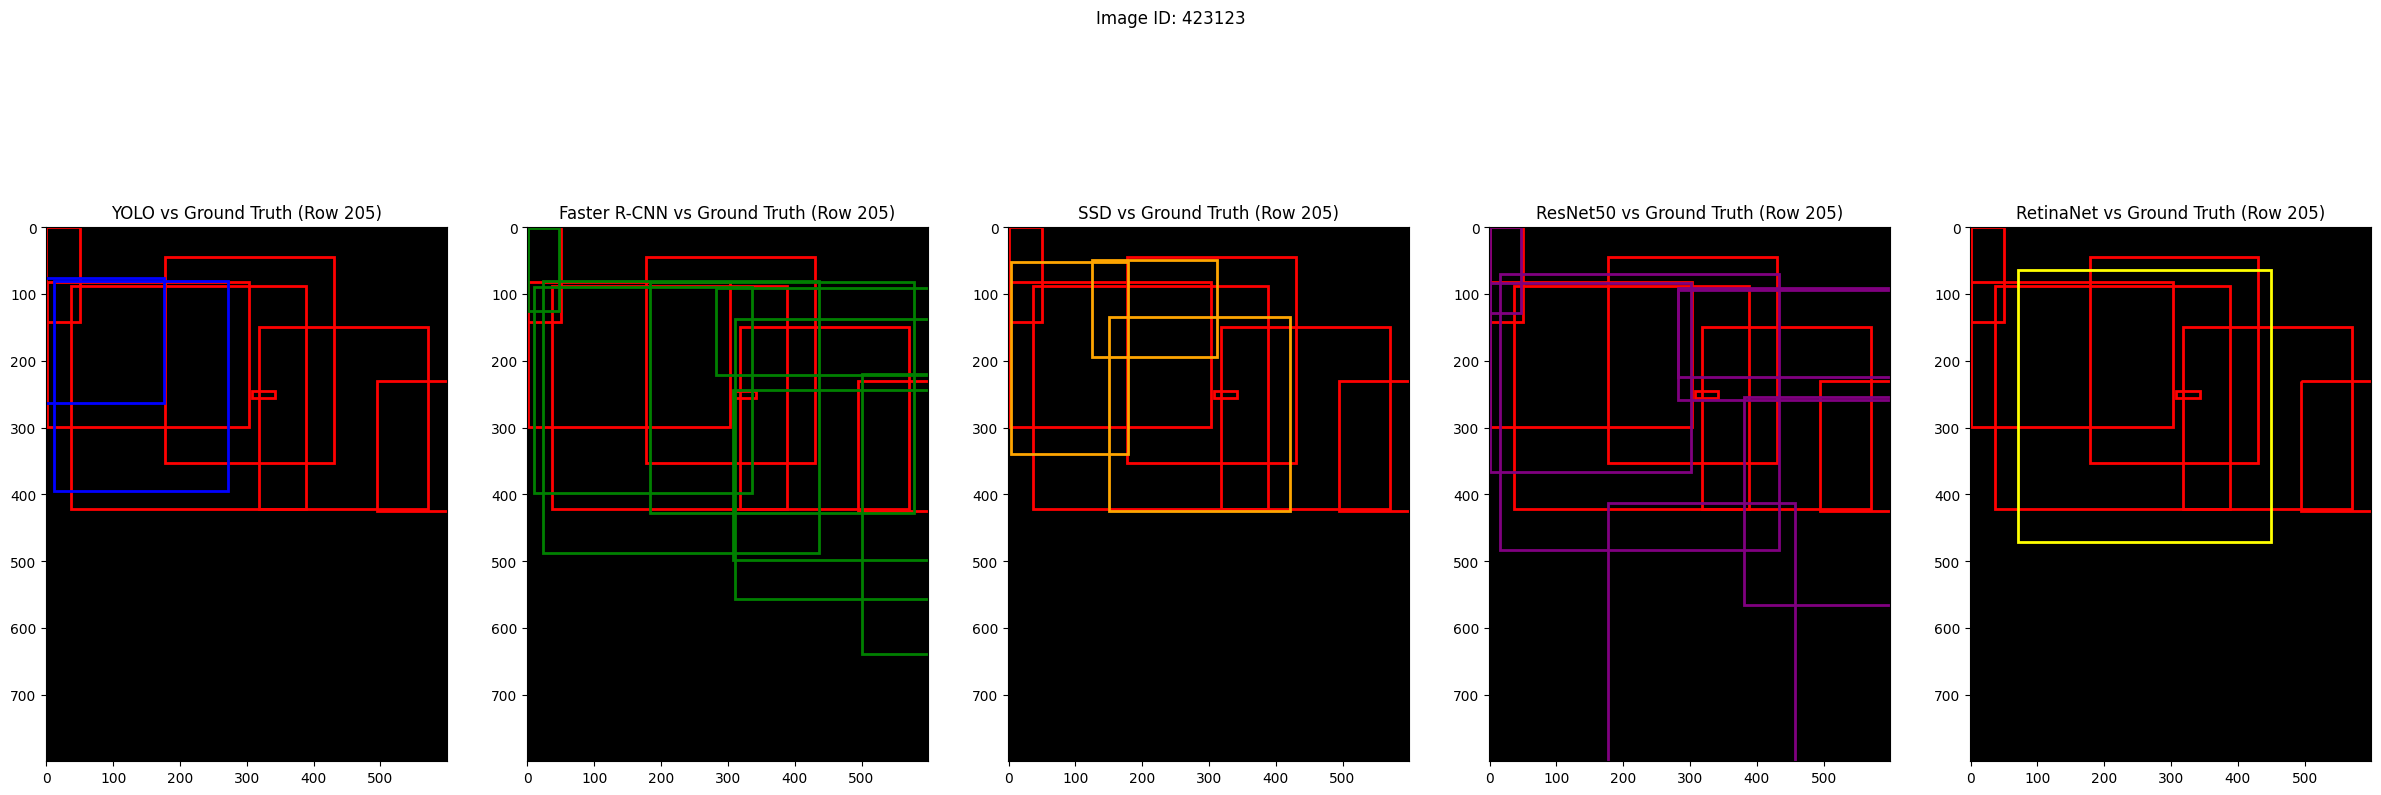

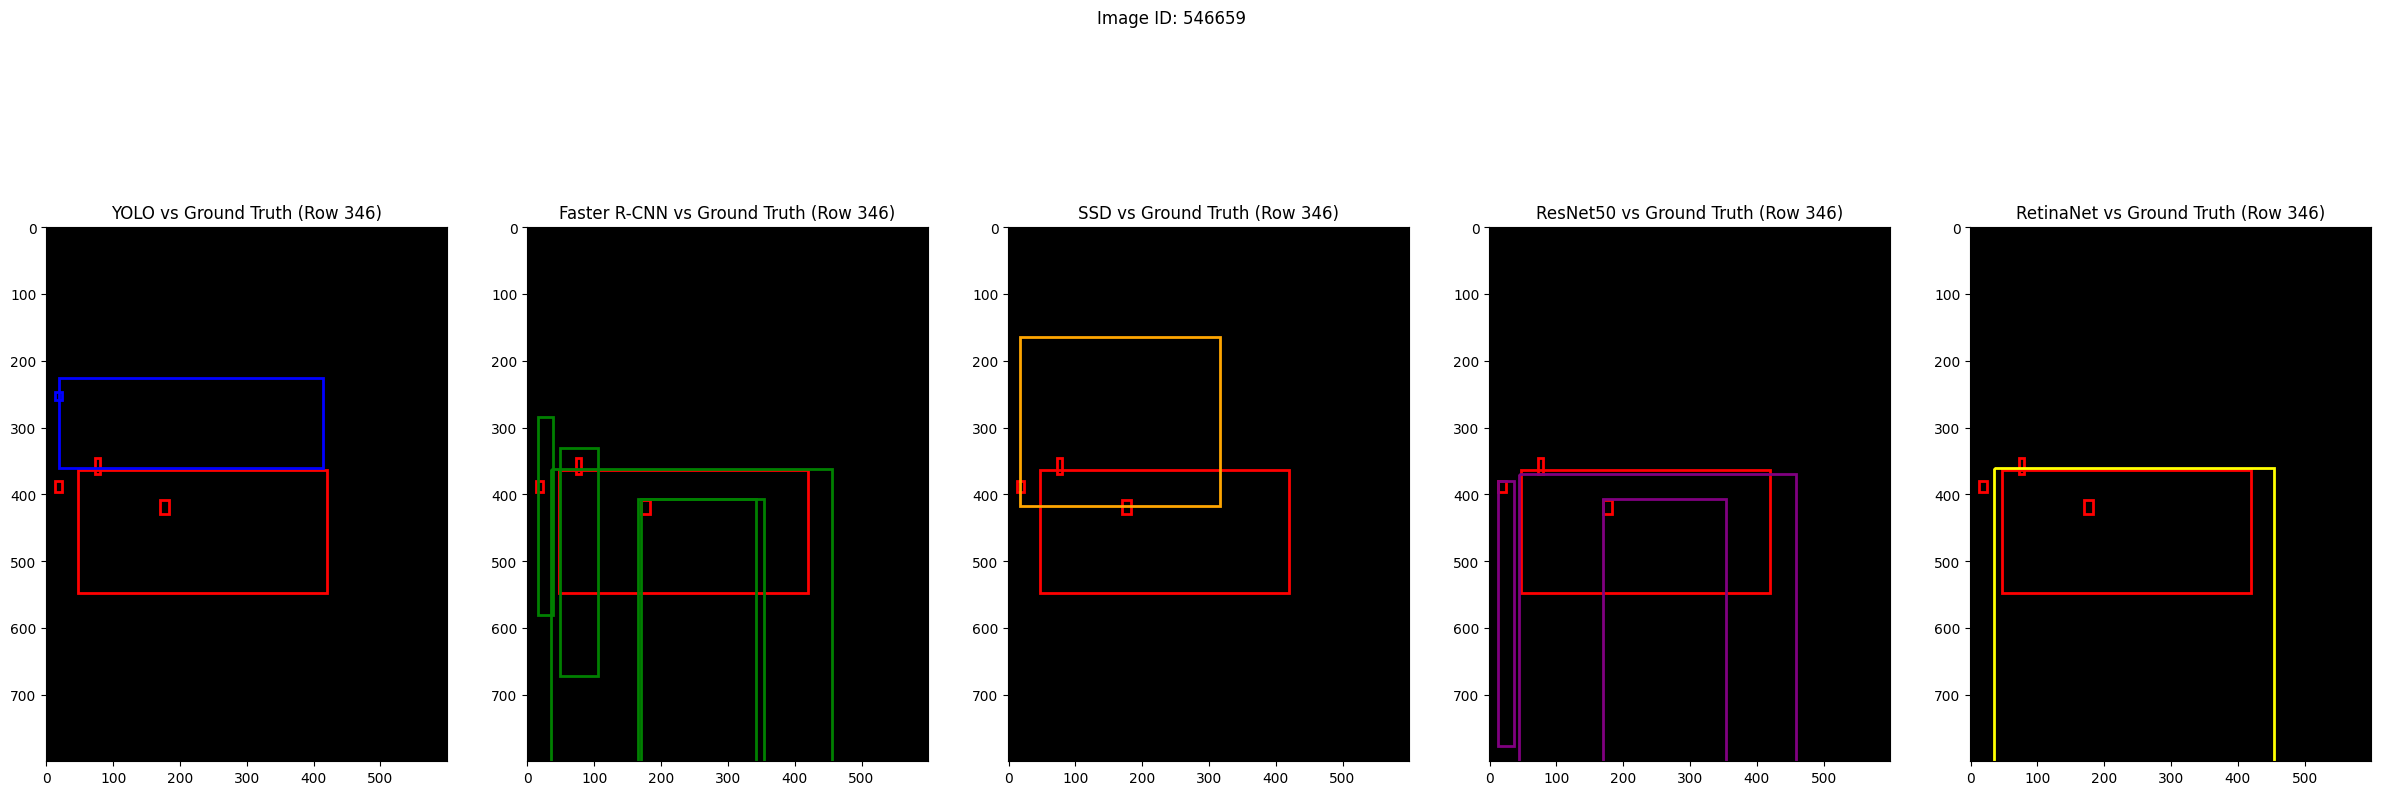

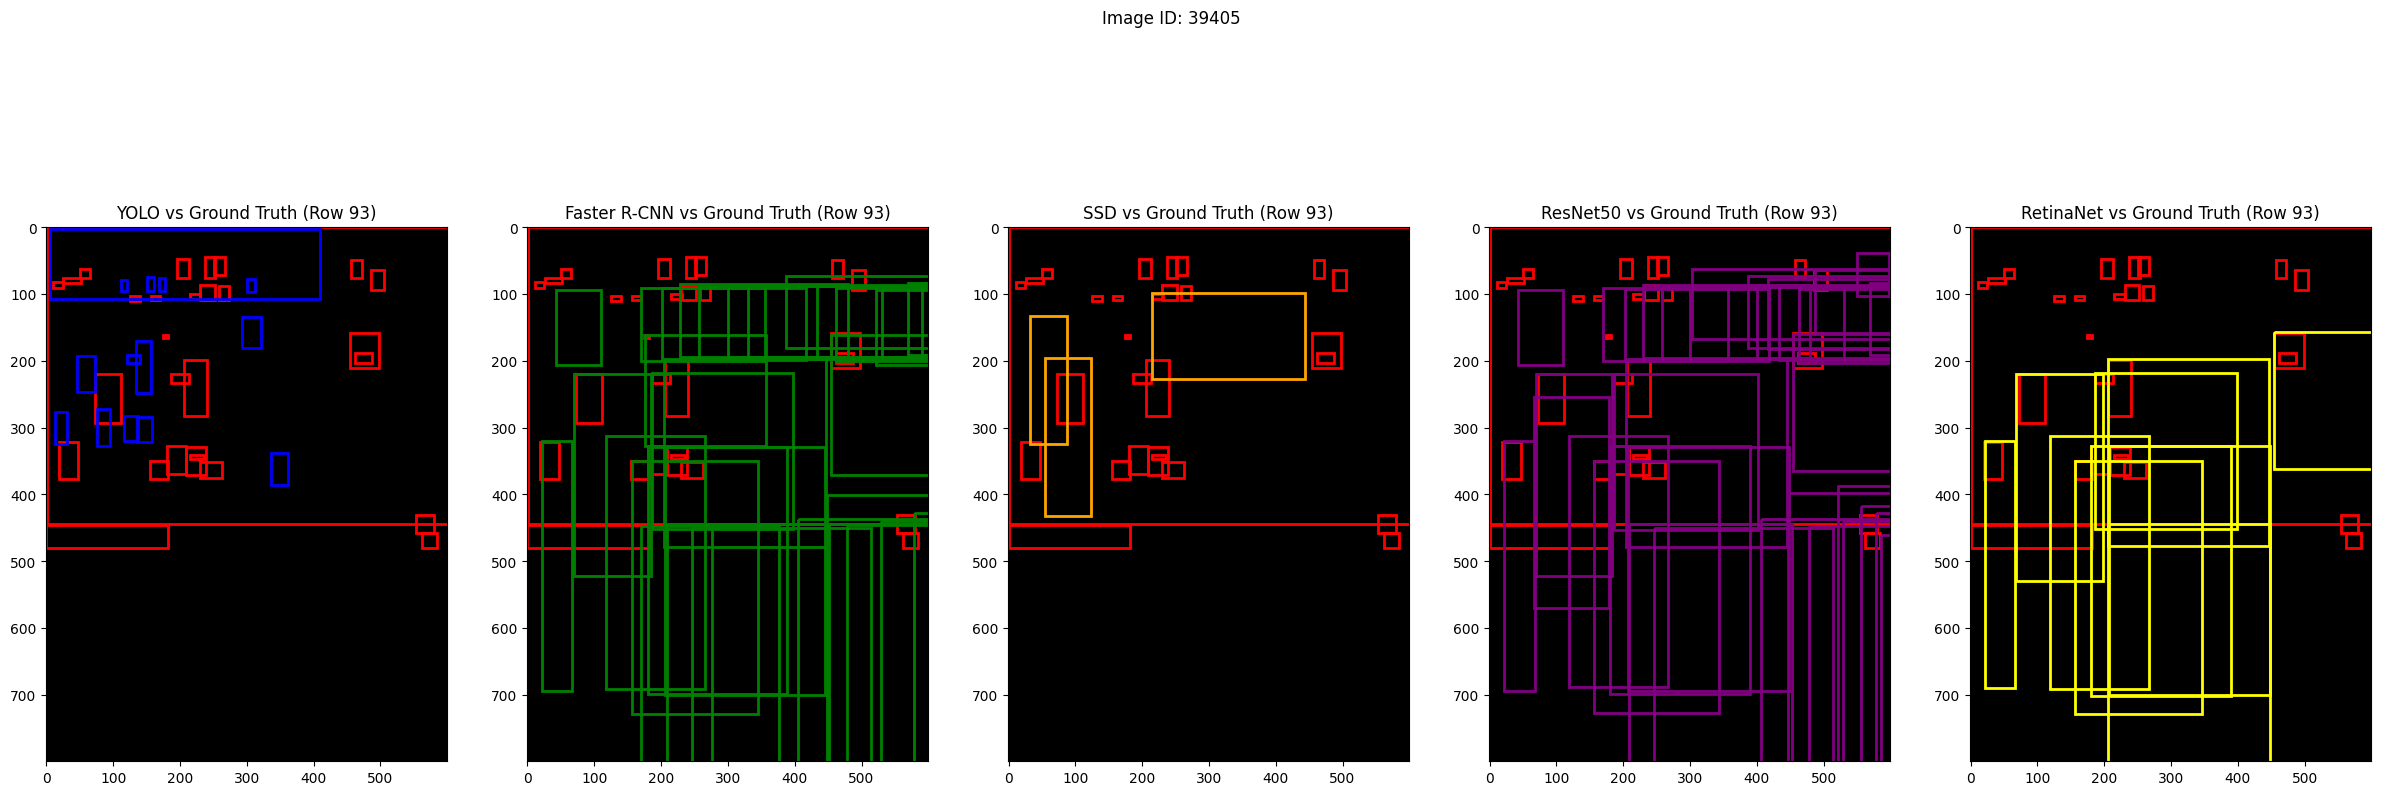

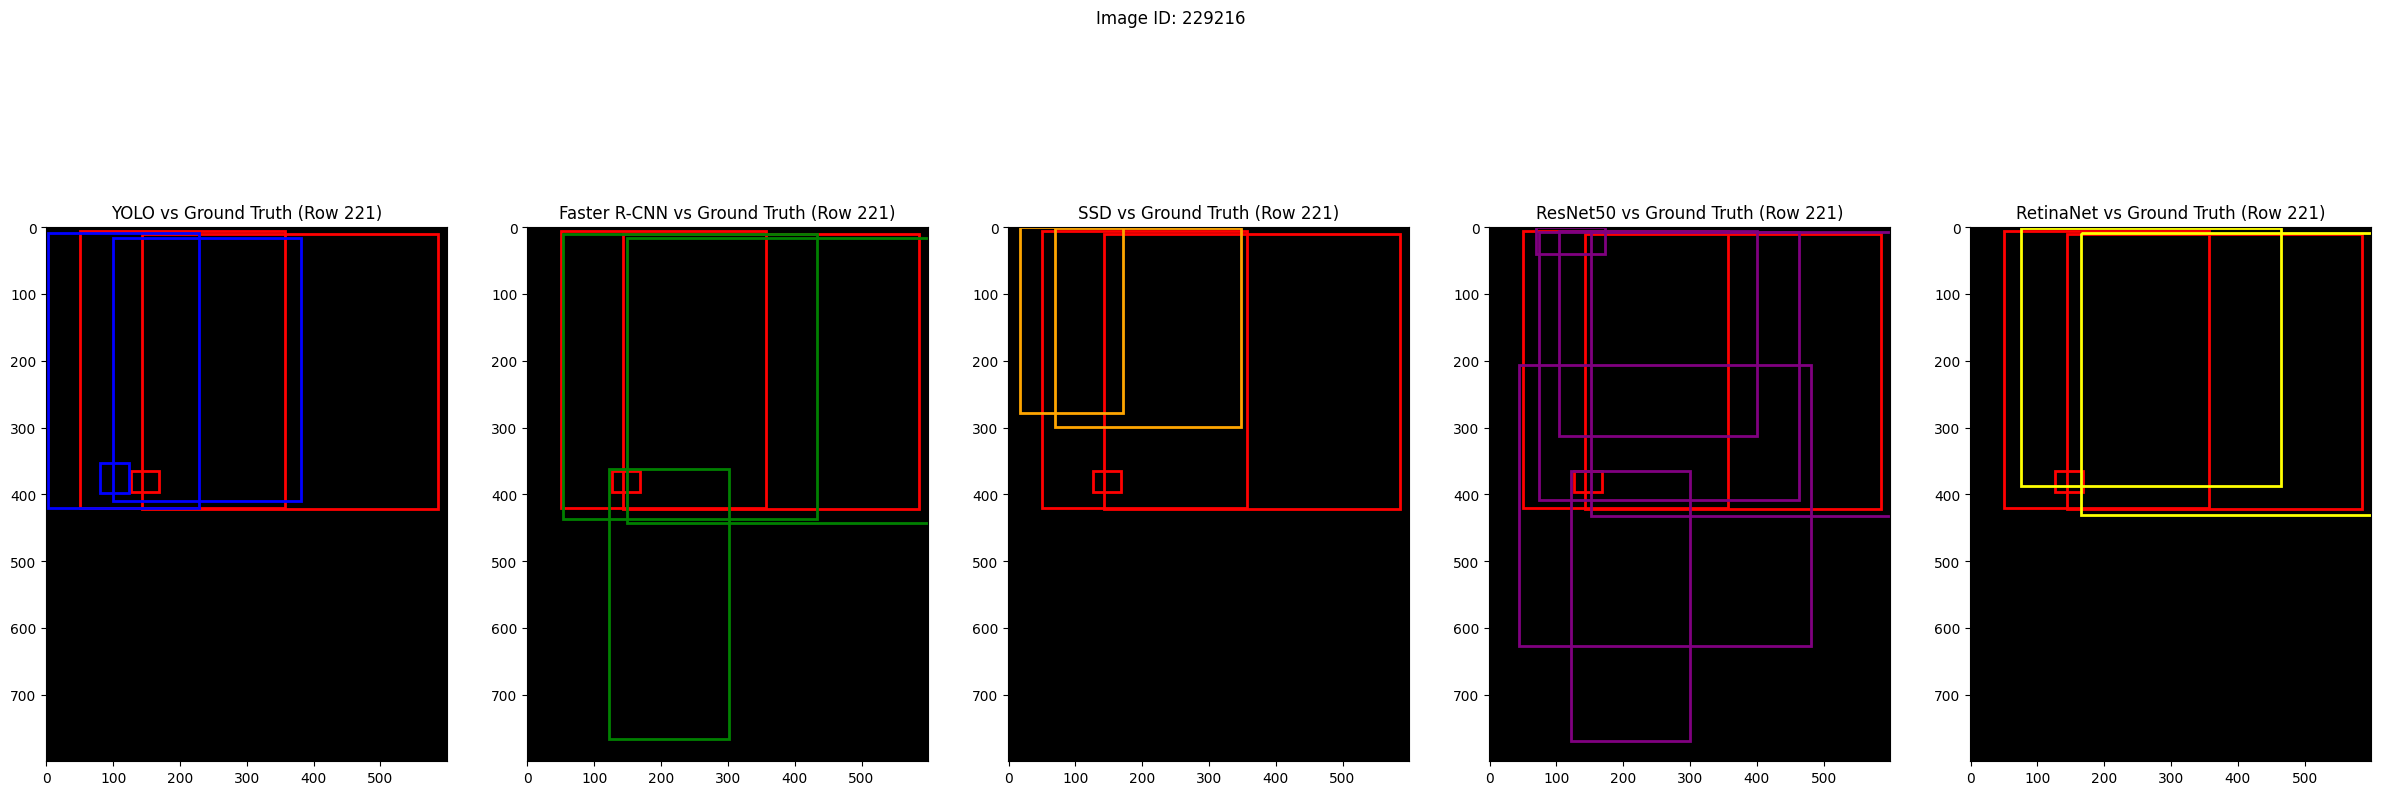

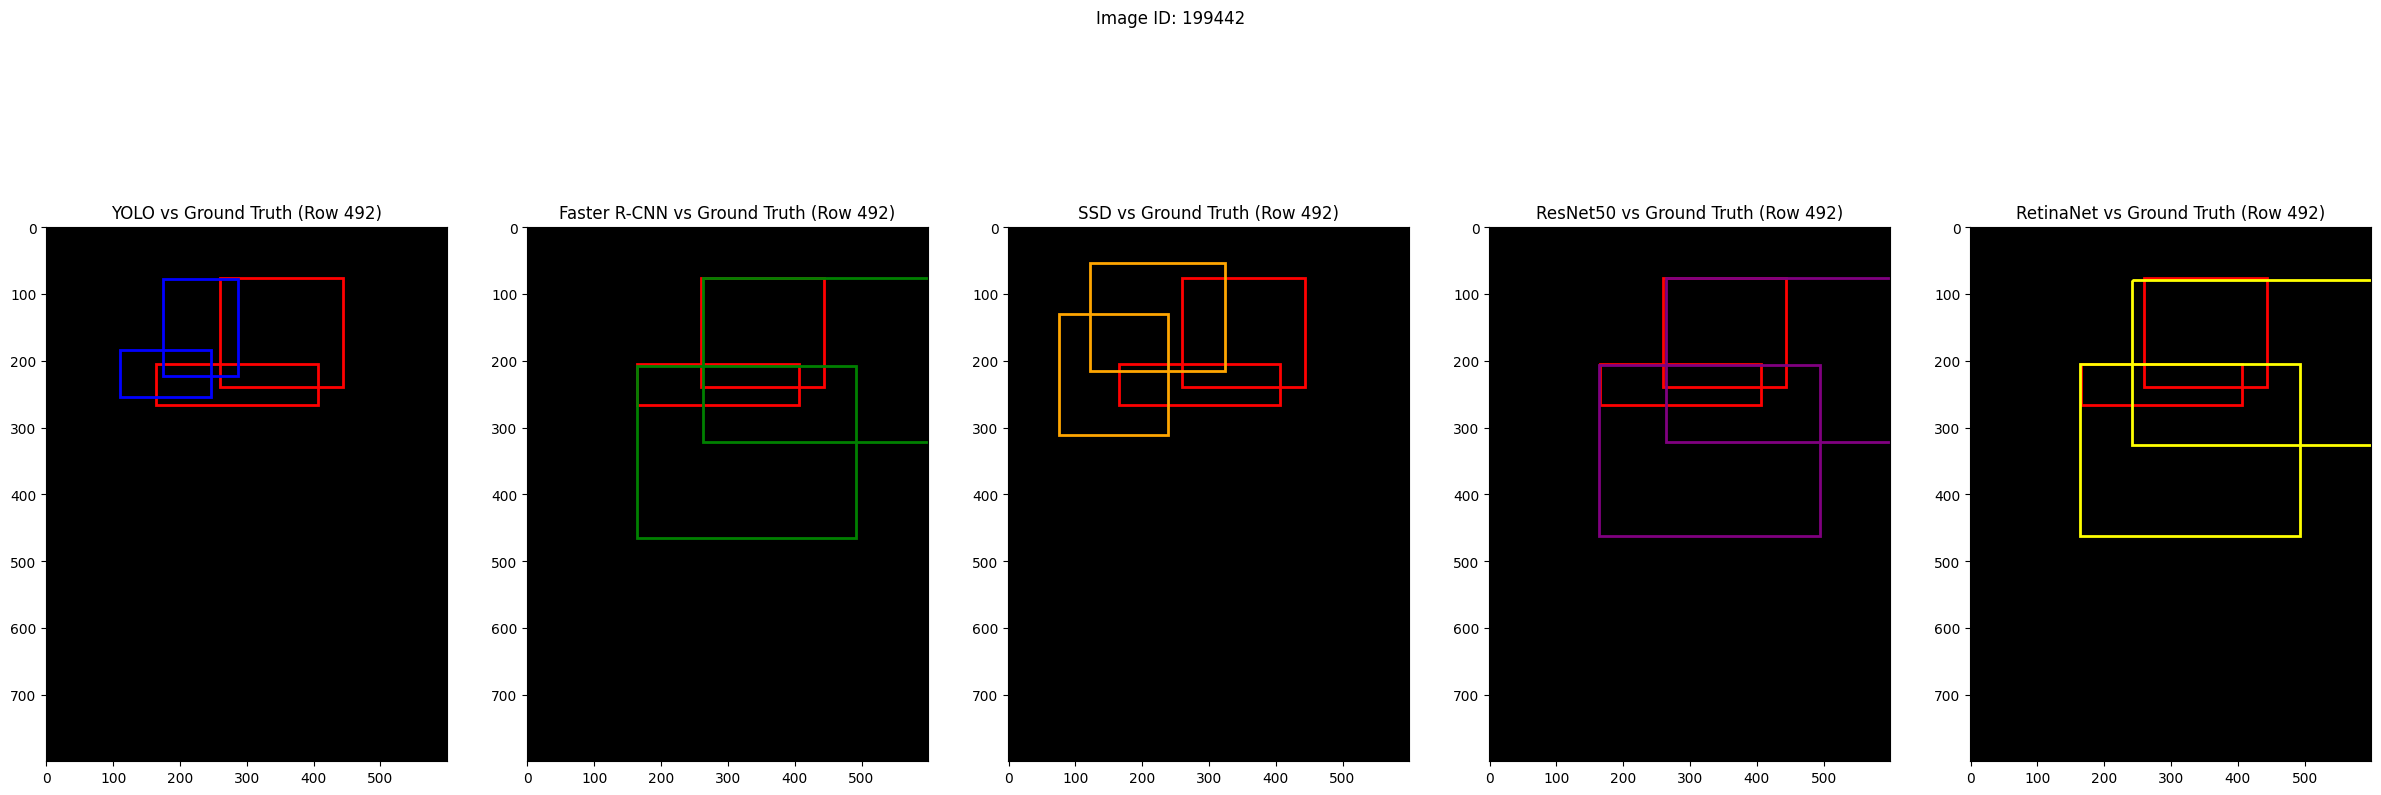

In [ ]:
# Assuming 'plot_boxes' is a function that can plot bounding boxes on a given axis `ax`
def plot_boxes(boxes, ax, color='r'):
    """
    Plot boxes on the provided axis (ax) with the specified color.
    """
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        rect = plt.Rectangle(
            (x_min, y_min), x_max - x_min, y_max - y_min,
            linewidth=2, edgecolor=color, facecolor='none'
        )
        ax.add_patch(rect)

# Function to plot YOLO, R-CNN, and SSD bounding boxes against Original for 5 rows
def plot_random_bboxes(objects_df, num_rows=5):
    """
    Plot Bounding Boxes comparison:
    1. YOLO vs Original
    2. R-CNN vs Original
    3. SSD vs Original
    for num_rows random rows.
    """
    # Sample 5 random rows from the dataframe
    sample_indices = random.sample(range(len(objects_df)), num_rows)

    # Loop through the randomly sampled rows
    for idx in sample_indices:
        # Create a figure with 5 subplots: YOLO, R-CNN, SSD, ResNet50, RetinaNet comparisons
        fig, axes = plt.subplots(1, 5, figsize=(30, 10))

        # Example image (use the actual dimensions for your case)
        img = np.zeros((800, 600, 3), dtype=np.uint8)  # Replace with actual image size if available

        # Extract bounding boxes
        bounding_boxes = objects_df.iloc[idx]['Bounding Boxes']
        yolo_boxes = objects_df.iloc[idx]['YOLO Boxes']
        faster_rcnn_boxes = objects_df.iloc[idx]['Faster R-CNN Boxes']
        ssd_boxes = objects_df.iloc[idx]['SSD Boxes']
        resnet50_boxes = objects_df.iloc[idx]['ResNet50 Boxes']
        retinanet_boxes = objects_df.iloc[idx]['RetinaNet Boxes']

        # Plot YOLO vs Original
        axes[0].imshow(img)
        plot_boxes(bounding_boxes, axes[0], color='red')  # Red: Original Bounding Boxes
        plot_boxes(yolo_boxes, axes[0], color='blue')     # Blue: YOLO Boxes
        axes[0].set_title(f"YOLO vs Ground Truth (Row {idx})")

        # Plot Faster R-CNN vs Original
        axes[1].imshow(img)
        plot_boxes(bounding_boxes, axes[1], color='red')  # Red: Original Bounding Boxes
        plot_boxes(faster_rcnn_boxes, axes[1], color='green')  # Green: R-CNN Boxes
        axes[1].set_title(f"Faster R-CNN vs Ground Truth (Row {idx})")

        # Plot SSD vs Original
        axes[2].imshow(img)
        plot_boxes(bounding_boxes, axes[2], color='red')  # Red: Original Bounding Boxes
        plot_boxes(ssd_boxes, axes[2], color='orange')    # Orange: SSD Boxes
        axes[2].set_title(f"SSD vs Ground Truth (Row {idx})")

        # Plot ResNet50 vs Original
        axes[3].imshow(img)
        plot_boxes(bounding_boxes, axes[3], color='red')  # Red: Original Bounding Boxes
        plot_boxes(resnet50_boxes, axes[3], color='purple')    # Purple: ResNet50 Boxes
        axes[3].set_title(f"ResNet50 vs Ground Truth (Row {idx})")

        # Plot RetinaNet vs Original
        axes[4].imshow(img)
        plot_boxes(bounding_boxes, axes[4], color='red')  # Red: Original Bounding Boxes
        plot_boxes(retinanet_boxes, axes[4], color='yellow')    # Yellow: RetinaNet Boxes
        axes[4].set_title(f"RetinaNet vs Ground Truth (Row {idx})")

        # Show the plots
        plt.suptitle(f"Image ID: {objects_df.iloc[idx]['ImageId']}")
        plt.show()

# Now call the function using your dataframe (replace 'objects_df' with your actual dataframe)
plot_random_bboxes(objects_df)


# Veri seti arttırma işlemi (Augmentasyon)

Oluşturduğumuz Dataframe'deki her bir görsele aşağıdaki augmentasyon işlemleri *ayrı ayrı* uygulanır:

*   Gürültü ekleme: `add_noise()`
*   Döndürme: `random_rotation()`
*   Kaydırma: `random_shift()`
*  Yakınlaştırma / Uzaklaştırma: `random_zoom()`



In [ ]:
import random
from skimage import io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.exposure import rescale_intensity

# Veri Artırma Fonksiyonları
def add_noise(image):
    """Rastgele gürültü ekler."""
    return random_noise(image)

def random_rotation(image, angle_range=20):
    """Rastgele döndürme uygular."""
    angle = random.uniform(-angle_range, angle_range)
    return rotate(image, angle, mode='wrap')

def random_shift(image, max_shift=0.2):
    """Görüntüyü rastgele kaydırır."""
    transform = AffineTransform(translation=(max_shift * image.shape[1], max_shift * image.shape[0]))
    return warp(image, transform, mode='wrap')

def random_zoom(image, zoom_range=(0.8, 1.2)):
    """Rastgele yakınlaştırma ve uzaklaştırma uygular."""
    zoom_factor = random.uniform(*zoom_range)
    transform = AffineTransform(scale=(zoom_factor, zoom_factor))
    return warp(image, transform, mode='wrap')

# Görüntü augmentasyon işlemleri
augmentation_functions = [add_noise, random_rotation, random_shift, random_zoom]

def augment_and_prepend_separately(df):
    augmented_rows = []
    for index, row in df.iterrows():
        original_image = np.array(row['Image'])
        for func in augmentation_functions:
            # Her augmentasyon ayrı bir satır için uygulanır
            augmented_image = func(original_image.copy())

            # Normalize ederek çıktı alınabilir aralığa dönüştür
            augmented_image = rescale_intensity(augmented_image, out_range=(0, 255)).astype('uint8')

            # Yeni satırı oluştur ve listeye ekle
            augmented_rows.append({
                "Image": augmented_image,
                "ImageId": f"{row['ImageId']}_{func.__name__}",
                "Original Labels": row['Original Labels'],
                "Detected Labels": row['Detected Labels'],
                "Bounding Boxes": row['Bounding Boxes'],
            })

    # Yeni satırları DataFrame'in başına ekle
    df = pd.concat([pd.DataFrame(augmented_rows), df], ignore_index=True)
    return df

# Kullanım:
df = augment_and_prepend_separately(df)

# Single Shot Detector ile nesne tespiti (Arttırılmış veri seti)

Bu kod, Single Shot Detector modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- İlk olarak, modelin çalışabilmesi için cihazımı (GPU veya CPU) belirliyorum. Eğer GPU varsa, GPU kullanılacak, yoksa CPU'ya geçilecek.
- Sonra, SSD modelini yüklüyorum. Bu model zaten önceden eğitilmiş olarak geliyor, yani COCO veri seti üzerinde eğitimli.
- COCO veri setinde bulunan etiketlerin bir listesini tanımlıyorum. Bu listede tüm nesne sınıfları yer alıyor, örneğin 'person', 'dog', 'car' gibi.
- Görselleri modele sokmadan önce bazı işlemler yapmam gerekiyor: Bunu bir `preprocess_image()` fonksiyonunda topladım. Görseli RGB formatına çevirip, boyutları 300x300'e küçültüp, tensöre dönüştürüyorum ve modelin gereksinimlerine göre normalize ediyorum.
- Daha sonra, modelden tahminleri almak için `predict()` fonksiyonu kullanılıyor. Bu fonksiyon, SSD modelini çalıştırıp, tahmin edilen nesnelerin kutularını, doğruluk skorlarını ve etiketlerini elde etmemi sağlıyor.
- Her bir görsel için tahminleri alıp, bunları dataframe'imdeki ilgili sütunlarda saklıyorum. Bu tahminler, modelin tespit ettiği etiketler ve bounding box'lar olacak.
- Son olarak, tahmin edilen etiketler ve kutular dataframe'e ekleniyor ve her bir görsel için SSD'nin tespit ettiği nesneleri takip edebilmem sağlanıyor.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `SSD Labels`, `SSD Boxes`

In [ ]:
import torch
from torchvision.models.detection import ssd300_vgg16
from torchvision import transforms

objects_df = df.copy() # Dataframe'in orijinalini korumak adına yeni bir df objesine kopyalıyoruz

# Initialize SSD model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ssd300_vgg16(pretrained=True)
model.eval().to(device)

# Define class labels (COCO classes used for SSD pre-trained model)
CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

# Preprocessing function
def preprocess_image(image):
    """Preprocess an image for SSD input."""

    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((300, 300)),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

# Prediction function
def predict(image_tensor, model, threshold=0.5):
    """Perform prediction using the SSD model."""
    with torch.no_grad():
        predictions = model(image_tensor)[0]

    # Extract boxes, scores, and labels above the threshold
    boxes = predictions['boxes']
    scores = predictions['scores']
    labels = predictions['labels']

    # Filter results
    mask = scores >= threshold
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    return boxes, scores, labels

# Iterate through the dataframe
ssd_labels = []
ssd_boxes = []

for index, row in objects_df.iterrows():
    # Fetch the image directly from the dataframe
    image = row['Image']

    # Preprocess the image
    image_tensor = preprocess_image(image)
    image_tensor = image_tensor.to(device)

    # Predict
    boxes, scores, labels = predict(image_tensor, model)

    # Save predictions
    ssd_labels.append([CLASSES[label] for label in labels])
    ssd_boxes.append(boxes.cpu().numpy().tolist())

# Add predictions back to the dataframe
objects_df["SSD Labels"] = ssd_labels
objects_df["SSD Boxes"] = ssd_boxes

objects_df

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ImageId,Original Labels,Detected Labels,Bounding Boxes,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes
0,"[[[96, 89, 151], [75, 113, 133], [116, 100, 12...",343706_add_noise,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,"[cell phone, person]","[[86.7347183227539, 185.64767456054688, 140.36..."
1,"[[[115, 126, 140], [107, 117, 125], [113, 124,...",343706_random_rotation,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[person],"[[10.669967651367188, 4.54669189453125, 283.37..."
2,"[[[227, 228, 217], [196, 194, 182], [197, 191,...",343706_random_shift,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[cell phone],"[[29.519014358520508, 123.44157409667969, 88.9..."
3,"[[[96, 107, 125], [96, 108, 120], [138, 147, 1...",343706_random_zoom,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[person],"[[10.7862548828125, 0.0, 273.501953125, 290.06..."
4,"[[[102, 53, 29], [74, 55, 34], [56, 88, 31], [...",25394_add_noise,"[person, wine glass, wine glass, bottle, bottl...",[],"[[41.99, 133.51, 245.85, 418.79], [355.2, 409....",NaN,NaN,NaN,"[person, wine glass, cup, wine glass]","[[28.003204345703125, 64.79310607910156, 180.4..."
...,...,...,...,...,...,...,...,...,...,...
2495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...",[],"[[181.84, 127.62, 146.82, 105.04], [1.03, 139....",[],[],[],"[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216..."
2496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...",[],"[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...",[],[],[],"[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8..."
2497,"[[[142, 101, 47], [144, 103, 47], [140, 100, 4...",460333,"[bed, chair, chair, person]",[],"[[146.37, 238.92, 283.05, 120.54], [385.95, 28...",[],[],[],"[person, chair, chair, bed]","[[139.82952880859375, 133.28683471679688, 187...."
2498,"[[[144, 154, 156], [141, 151, 153], [142, 150,...",123480,"[toothbrush, toothbrush, person, cell phone]",[],"[[212.22, 313.99, 28.81, 27.92], [278.9, 374.4...",[],[],[],[person],"[[59.182838439941406, 75.66661071777344, 188.6..."


# ResNet50 Modeli ile Nesne Tespiti (Arttırılmış Veri Seti)

Bu kod, ResNet50 modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- İlk olarak, modelin çalışabilmesi için cihazımı (GPU veya CPU) belirliyorum. Eğer GPU varsa, GPU kullanılacak, yoksa CPU'ya geçilecek.
- Sonra, ResNet50 modelini yüklüyorum. Bu model zaten önceden eğitilmiş olarak geliyor, yani COCO veri seti üzerinde eğitimli.
- COCO veri setinde bulunan etiketlerin bir listesini tanımlıyorum. Bu listede tüm nesne sınıfları yer alıyor, örneğin 'person', 'dog', 'car' gibi.
- Görselleri modele sokmadan önce bazı işlemler yapmam gerekiyor: Bunu bir `preprocess_image()` fonksiyonunda topladım. Görseli RGB formatına çevirip, boyutları 300x300'e küçültüp, tensöre dönüştürüyorum ve modelin gereksinimlerine göre normalize ediyorum.
- Daha sonra, modelden tahminleri almak için `predict()` fonksiyonu kullanılıyor. Bu fonksiyon, ResNet50 modelini çalıştırıp, tahmin edilen nesnelerin kutularını, doğruluk skorlarını ve etiketlerini elde etmemi sağlıyor.
- Her bir görsel için tahminleri alıp, bunları dataframe'imdeki ilgili sütunlarda saklıyorum. Bu tahminler, modelin tespit ettiği etiketler ve bounding box'lar olacak.
- Son olarak, tahmin edilen etiketler ve kutular dataframe'e ekleniyor ve her bir görsel için ResNet50'nin tespit ettiği nesneleri takip edebilmem sağlanıyor.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `ResNet50 Labels`, `ResNet50 Boxes`

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

# Initialize Faster R-CNN with ResNet-50 as the backbone
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval().to(device)

# Define class labels (COCO classes used for the pre-trained model)
CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Preprocessing function
def preprocess_image(image):
    """Preprocess an image for Faster R-CNN input."""
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

# Prediction function
def predict(image_tensor, model, threshold=0.5):
    """Perform prediction using the Faster R-CNN model."""
    with torch.no_grad():
        predictions = model(image_tensor)[0]

    # Extract boxes, scores, and labels above the threshold
    boxes = predictions['boxes']
    scores = predictions['scores']
    labels = predictions['labels']

    # Filter results
    mask = scores >= threshold
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    return boxes, scores, labels

# Iterate through the dataframe
resnet50_labels = []
resnet50_boxes = []

for index, row in objects_df.iterrows():
    # Fetch the image directly from the dataframe
    image = row['Image']

    # Preprocess the image
    image_tensor = preprocess_image(image)
    image_tensor = image_tensor.to(device)

    # Predict
    boxes, scores, labels = predict(image_tensor, model)

    # Save predictions
    resnet50_labels.append([CLASSES[label] for label in labels])
    resnet50_boxes.append(boxes.cpu().numpy().tolist())

# Add predictions back to the dataframe
objects_df["ResNet50 Labels"] = resnet50_labels
objects_df["ResNet50 Boxes"] = resnet50_boxes

objects_df


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ImageId,Original Labels,Detected Labels,Bounding Boxes,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes
0,"[[[96, 89, 151], [75, 113, 133], [116, 100, 12...",343706_add_noise,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,"[cell phone, person]","[[86.7347183227539, 185.64767456054688, 140.36...","[cell phone, donut, person]","[[180.08290100097656, 312.1746520996094, 309.6..."
1,"[[[115, 126, 140], [107, 117, 125], [113, 124,...",343706_random_rotation,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[person],"[[10.669967651367188, 4.54669189453125, 283.37...","[person, teddy bear]","[[31.49270248413086, 14.683714866638184, 486.1..."
2,"[[[227, 228, 217], [196, 194, 182], [197, 191,...",343706_random_shift,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[cell phone],"[[29.519014358520508, 123.44157409667969, 88.9...","[teddy bear, person]","[[49.55408477783203, 18.733543395996094, 318.9..."
3,"[[[96, 107, 125], [96, 108, 120], [138, 147, 1...",343706_random_zoom,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[person],"[[10.7862548828125, 0.0, 273.501953125, 290.06...",[person],"[[17.54095458984375, 12.695734024047852, 477.1..."
4,"[[[102, 53, 29], [74, 55, 34], [56, 88, 31], [...",25394_add_noise,"[person, wine glass, wine glass, bottle, bottl...",[],"[[41.99, 133.51, 245.85, 418.79], [355.2, 409....",NaN,NaN,NaN,"[person, wine glass, cup, wine glass]","[[28.003204345703125, 64.79310607910156, 180.4...","[person, wine glass, bottle, cup, bottle, bott...","[[35.356109619140625, 140.44927978515625, 286...."
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...",[],"[[181.84, 127.62, 146.82, 105.04], [1.03, 139....",[],[],[],"[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433...."
2496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...",[],"[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...",[],[],[],"[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 607.35..."
2497,"[[[142, 101, 47], [144, 103, 47], [140, 100, 4...",460333,"[bed, chair, chair, person]",[],"[[146.37, 238.92, 283.05, 120.54], [385.95, 28...",[],[],[],"[person, chair, chair, bed]","[[139.82952880859375, 133.28683471679688, 187....","[person, chair, chair, bed, chair, cup, dog, c...","[[302.09222412109375, 216.8363037109375, 399.2..."
2498,"[[[144, 154, 156], [141, 151, 153], [142, 150,...",123480,"[toothbrush, toothbrush, person, cell phone]",[],"[[212.22, 313.99, 28.81, 27.92], [278.9, 374.4...",[],[],[],[person],"[[59.182838439941406, 75.66661071777344, 188.6...","[person, toothbrush]","[[105.26705932617188, 116.03990936279297, 406...."


# RetinaNet Modeli ile nesne tespiti (Arttırılmış Veri Seti)

Bu kod, RetinaNet modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- İlk olarak, modelin çalışabilmesi için cihazımı (GPU veya CPU) belirliyorum. Eğer GPU varsa, GPU kullanılacak, yoksa CPU'ya geçilecek.
- Sonra, RetinaNet modelini yüklüyorum. Bu model zaten önceden eğitilmiş olarak geliyor, yani COCO veri seti üzerinde eğitimli.
- COCO veri setinde bulunan etiketlerin bir listesini tanımlıyorum. Bu listede tüm nesne sınıfları yer alıyor, örneğin 'person', 'dog', 'car' gibi.
- Görselleri modele sokmadan önce bazı işlemler yapmam gerekiyor: Bunu bir `preprocess_image()` fonksiyonunda topladım. Görseli RGB formatına çevirip, boyutları 300x300'e küçültüp, tensöre dönüştürüyorum ve modelin gereksinimlerine göre normalize ediyorum.
- Daha sonra, modelden tahminleri almak için `predict()` fonksiyonu kullanılıyor. Bu fonksiyon, RetinaNet modelini çalıştırıp, tahmin edilen nesnelerin kutularını, doğruluk skorlarını ve etiketlerini elde etmemi sağlıyor.
- Her bir görsel için tahminleri alıp, bunları dataframe'imdeki ilgili sütunlarda saklıyorum. Bu tahminler, modelin tespit ettiği etiketler ve bounding box'lar olacak.
- Son olarak, tahmin edilen etiketler ve kutular dataframe'e ekleniyor ve her bir görsel için RetinaNet'in tespit ettiği nesneleri takip edebilmem sağlanıyor.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `RetinaNet Labels`, `RetinaNet Boxes`

In [ ]:
from torchvision.models.detection import retinanet_resnet50_fpn

# Initialize RetinaNet
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = retinanet_resnet50_fpn(pretrained=True)
model.eval().to(device)

# Define class labels (COCO classes used for RetinaNet pre-trained model)
CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Preprocessing function
def preprocess_image(image):
    """Preprocess an image for RetinaNet input."""
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

# Prediction function
def predict(image_tensor, model, threshold=0.5):
    """Perform prediction using the RetinaNet model."""
    with torch.no_grad():
        predictions = model(image_tensor)[0]

    # Extract boxes, scores, and labels above the threshold
    boxes = predictions['boxes']
    scores = predictions['scores']
    labels = predictions['labels']

    # Filter results
    mask = scores >= threshold
    boxes = boxes[mask]
    scores = scores[mask]
    labels = labels[mask]

    return boxes, scores, labels

# Iterate through the dataframe
retinanet_labels = []
retinanet_boxes = []

for index, row in objects_df.iterrows():
    # Fetch the image directly from the dataframe
    image = row['Image']

    # Preprocess the image
    image_tensor = preprocess_image(image)
    image_tensor = image_tensor.to(device)

    # Predict
    boxes, scores, labels = predict(image_tensor, model)

    # Save predictions
    retinanet_labels.append([CLASSES[label] for label in labels])
    retinanet_boxes.append(boxes.cpu().numpy().tolist())

# Add predictions back to the dataframe
objects_df["RetinaNet Labels"] = retinanet_labels
objects_df["RetinaNet Boxes"] = retinanet_boxes

# Display the updated dataframe
objects_df


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ImageId,Original Labels,Detected Labels,Bounding Boxes,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,"[[[96, 89, 151], [75, 113, 133], [116, 100, 12...",343706_add_noise,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,"[cell phone, person]","[[86.7347183227539, 185.64767456054688, 140.36...","[cell phone, donut, person]","[[180.08290100097656, 312.1746520996094, 309.6...","[cell phone, person]","[[182.55307006835938, 312.3626403808594, 309.9..."
1,"[[[115, 126, 140], [107, 117, 125], [113, 124,...",343706_random_rotation,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[person],"[[10.669967651367188, 4.54669189453125, 283.37...","[person, teddy bear]","[[31.49270248413086, 14.683714866638184, 486.1...","[person, cell phone]","[[15.159316062927246, 0.35408568382263184, 640..."
2,"[[[227, 228, 217], [196, 194, 182], [197, 191,...",343706_random_shift,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[cell phone],"[[29.519014358520508, 123.44157409667969, 88.9...","[teddy bear, person]","[[49.55408477783203, 18.733543395996094, 318.9...",[cell phone],"[[54.187232971191406, 215.18873596191406, 180...."
3,"[[[96, 107, 125], [96, 108, 120], [138, 147, 1...",343706_random_zoom,"[cell phone, person]",[],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,NaN,NaN,[person],"[[10.7862548828125, 0.0, 273.501953125, 290.06...",[person],"[[17.54095458984375, 12.695734024047852, 477.1...",[person],"[[0.0, 6.131222724914551, 625.410400390625, 48..."
4,"[[[102, 53, 29], [74, 55, 34], [56, 88, 31], [...",25394_add_noise,"[person, wine glass, wine glass, bottle, bottl...",[],"[[41.99, 133.51, 245.85, 418.79], [355.2, 409....",NaN,NaN,NaN,"[person, wine glass, cup, wine glass]","[[28.003204345703125, 64.79310607910156, 180.4...","[person, wine glass, bottle, cup, bottle, bott...","[[35.356109619140625, 140.44927978515625, 286....","[person, cup, wine glass, cell phone, bottle]","[[40.10919952392578, 141.62896728515625, 269.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...",[],"[[181.84, 127.62, 146.82, 105.04], [1.03, 139....",[],[],[],"[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 442.49..."
2496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...",[],"[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...",[],[],[],"[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 607.35...","[cup, dining table, chair, cake, fork, fork, p...","[[0.43162569403648376, 210.2329559326172, 78.8..."
2497,"[[[142, 101, 47], [144, 103, 47], [140, 100, 4...",460333,"[bed, chair, chair, person]",[],"[[146.37, 238.92, 283.05, 120.54], [385.95, 28...",[],[],[],"[person, chair, chair, bed]","[[139.82952880859375, 133.28683471679688, 187....","[person, chair, chair, bed, chair, cup, dog, c...","[[302.09222412109375, 216.8363037109375, 399.2...","[person, chair, bed, chair, bird]","[[302.7027893066406, 218.1249542236328, 399.92..."
2498,"[[[144, 154, 156], [141, 151, 153], [142, 150,...",123480,"[toothbrush, toothbrush, person, cell phone]",[],"[[212.22, 313.99, 28.81, 27.92], [278.9, 374.4...",[],[],[],[person],"[[59.182838439941406, 75.66661071777344, 188.6...","[person, toothbrush]","[[105.26705932617188, 116.03990936279297, 406....",[person],"[[116.19678497314453, 111.59707641601562, 399...

# YOLO ile nesne tespiti (Arttırılmış veri seti)

Bu kod, YOLO v3 modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- **Nesne Etiketi Fonksiyonu `yolo_obj_labels()`**:
  - Bu fonksiyon, YOLO modelinden dönen kutulardan (boxes) nesne etiketlerini çıkarmak için kullanılıyor.
  - Her bir kutu (box) içinde, nesne sınıfının ID'si ve güven seviyesi (confidence) bulunuyor. Eğer bu bilgiler mevcutsa, kutunun sınıf ID'si kullanılarak doğru etiketi `class_names` listesinden alıyorum ve bunları `obj_labels` listesine ekliyorum.

- **YOLO Bounding Box Formatını Çevirme `convert_to_min_format()`**:
  - YOLO'nun tespit ettiği kutu bilgisi [x_center, y_center, width, height, confidence, class_id, ...] formatında olur. Bu yüzden bunu geleneksel bounding box formatına ([x_min, y_min, width, height]) çevirmemiz gerekiyor.
  - Burada, merkez (center) ve boyut (width, height) bilgilerini kullanarak `x_min`, `y_min`, `width`, ve `height` hesaplıyorum. Bu sayede her kutu, daha yaygın kullanılan formatta oluyor.

- **Ana Döngü**:
  - İlk olarak, dataframe'deki her bir satırı işliyorum ve bu satırlardaki görseller üzerinde işlemler yapıyorum.
  - Görseli RGB formatına çeviriyorum ve ardından modeli beslemek için gereken boyutta (m.width ve m.height) yeniden boyutlandırıyorum.
  - YOLO modelinden, bu boyutlandırılmış görseldeki nesneleri tespit ediyorum (bu işlem `detect_objects()` fonksiyonuyla yapılır).
  - YOLO modelinden dönen kutuları, sınıf adlarına çevirerek `yolo_obj_labels()` fonksiyonu ile etiketler alıyorum.
  - Bu etiketleri, `all_labels` listesine ekliyorum.
  - Ayrıca, her bir nesne tespiti sonrası nesnelerin kutularını uygun formata dönüştürüp (`convert_to_min_format()`), `all_boxes` listesine ekliyorum.
  - En sonunda, bu listeleri dataframe'e ekliyor ve her satırın tespit ettiği etiket ve kutu bilgilerini saklıyorum.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `Detected Labels`, `YOLO Boxes`

In [ ]:
def yolo_obj_labels(boxes, class_names):
    obj_labels = []
    for i in range(len(boxes)):
        box = boxes[i]
        if len(box) >= 7 and class_names:
            cls_conf = box[5]
            cls_id = box[6]
            obj_labels.append(class_names[cls_id]) # , cls_conf))

    return obj_labels

# Function to convert YOLO bounding box format to [x_min, y_min, width, height]
def convert_to_min_format(boxes, image_width=m.width, image_height=m.height):
    converted_boxes = []

    for box in boxes:
        # Extract the bounding box components
        x_center, y_center, width, height, confidence, class_id, _ = box

        # Convert to the min format (x_min, y_min, width, height)
        x_min = (x_center - width / 2) * image_width
        y_min = (y_center - height / 2) * image_height
        width = width * image_width
        height = height * image_height

        converted_boxes.append([x_min.item(), y_min.item(), width.item(), height.item()])

    return converted_boxes

# Main loop to process images in the dataframe
all_labels = []  # Create a list to store labels for all rows at once
all_boxes = []

for index, row in objects_df.iterrows():
    img = np.array(row['Image'])

    # Convert the image to RGB
    original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to the input size for the model
    resized_image = cv2.resize(original_image, (m.width, m.height))

    # Detection parameters
    nms_thresh = 0.6
    iou_thresh = 0.4

    # Get the boxes from the detection function
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

    # Get labels from YOLO output
    yolo_labels = yolo_obj_labels(boxes, class_names)

    # Append the detected labels to the list
    all_labels.append(yolo_labels)

    # Print the objects found and the confidence level
    print_objects(boxes, class_names)

    # Get YOLO bounding boxes
    converted_boxes = convert_to_min_format(boxes)
    all_boxes.append(converted_boxes)

    print("\n---------------------------------------------\n")

# Assign the list to the dataframe in one go
objects_df["Detected Labels"] = all_labels
objects_df["YOLO Boxes"] = all_boxes

objects_df

Streaming output truncated to the last 5000 lines.

---------------------------------------------



It took 1.248 seconds to detect the objects in the image.

Number of Objects Detected: 6 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 1.000000
3. person: 1.000000
4. person: 0.999999
5. person: 0.999998
6. car: 0.990721

---------------------------------------------



It took 1.114 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. person: 1.000000
2. baseball bat: 0.999995
3. frisbee: 0.999965

---------------------------------------------



It took 1.204 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. person: 1.000000
2. person: 0.999999
3. person: 0.992105

---------------------------------------------



It took 1.127 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence L

,Image,ImageId,Original Labels,Detected Labels,Bounding Boxes,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,"[[[96, 89, 151], [75, 113, 133], [116, 100, 12...",343706_add_noise,"[cell phone, person]","[person, cell phone]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,"[[27.147624969482422, -3.5339956283569336, 360...",NaN,"[cell phone, person]","[[86.7347183227539, 185.64767456054688, 140.36...","[cell phone, donut, person]","[[180.08290100097656, 312.1746520996094, 309.6...","[cell phone, person]","[[182.55307006835938, 312.3626403808594, 309.9..."
1,"[[[115, 126, 140], [107, 117, 125], [113, 124,...",343706_random_rotation,"[cell phone, person]","[person, cell phone]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,"[[21.478361129760742, 28.01373291015625, 373.7...",NaN,[person],"[[10.669967651367188, 4.54669189453125, 283.37...","[person, teddy bear]","[[31.49270248413086, 14.683714866638184, 486.1...","[person, cell phone]","[[15.159316062927246, 0.35408568382263184, 640..."
2,"[[[227, 228, 217], [196, 194, 182], [197, 191,...",343706_random_shift,"[cell phone, person]",[cell phone],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,"[[36.571617126464844, 179.4595947265625, 81.21...",NaN,[cell phone],"[[29.519014358520508, 123.44157409667969, 88.9...","[teddy bear, person]","[[49.55408477783203, 18.733543395996094, 318.9...",[cell phone],"[[54.187232971191406, 215.18873596191406, 180...."
3,"[[[96, 107, 125], [96, 108, 120], [138, 147, 1...",343706_random_zoom,"[cell phone, person]",[person],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...",NaN,"[[17.159748077392578, 17.507965087890625, 382....",NaN,[person],"[[10.7862548828125, 0.0, 273.501953125, 290.06...",[person],"[[17.54095458984375, 12.695734024047852, 477.1...",[person],"[[0.0, 6.131222724914551, 625.410400390625, 48..."
4,"[[[102, 53, 29], [74, 55, 34], [56, 88, 31], [...",25394_add_noise,"[person, wine glass, wine glass, bottle, bottl...","[cup, person, wine glass, bottle, person, bott...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....",NaN,"[[215.79046630859375, 277.9111328125, 106.2021...",NaN,"[person, wine glass, cup, wine glass]","[[28.003204345703125, 64.79310607910156, 180.4...","[person, wine glass, bottle, cup, bottle, bott...","[[35.356109619140625, 140.44927978515625, 286....","[person, cup, wine glass, cell phone, bottle]","[[40.10919952392578, 141.62896728515625, 269.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...","[person, teddy bear, chair, sofa, tvmonitor, c...","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....",[],"[[150.8724365234375, 139.75730895996094, 128.8...",[],"[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 442.49..."
2496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...","[fork, cup, person, cake, diningtable, chair, ...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...",[],"[[241.4903564453125, 206.92311096191406, 107.8...",[],"[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 607.35...","[cup, dining table, chair, cake, fork, fork, p...","[[0.43162569403648376, 210.2329559326172, 78.8..."
2497,"[[[142, 101, 47], [144, 103, 47], [140, 100, 4...",460333,"[bed, chair, chair, person]","[person, chair, bed, chair]","[[146.37, 238.92, 283.05, 120.54], [385.95, 28...",[],"[[201.81642150878906, 189.14031982421875, 56.6...",[],"[person, chair, chair, be

# Faster R-CNN ile Nesne Tespiti (Arttırılmış veri seti)

Bu kod, Faster R-CNN modelini kullanarak bir veri çerçevesindeki resimlerde nesne tespiti yapmamızı sağlıyor.

- İlk olarak, modelin çalışabilmesi için cihazımı (GPU veya CPU) belirliyorum. Eğer GPU varsa, GPU kullanılacak, yoksa CPU'ya geçilecek.
- Sonra, Faster R-CNN modelini yüklüyorum. Bu model zaten önceden eğitilmiş olarak geliyor, yani COCO veri seti üzerinde eğitimli.
- COCO veri setinde bulunan etiketlerin bir listesini tanımlıyorum. Bu listede tüm nesne sınıfları yer alıyor, örneğin 'person', 'dog', 'car' gibi.
- Görselleri modele sokmadan önce bazı işlemler yapmam gerekiyor: Bunu bir `preprocess_image()` fonksiyonunda topladım. Görseli RGB formatına çevirip, boyutları 300x300'e küçültüp, tensöre dönüştürüyorum ve modelin gereksinimlerine göre normalize ediyorum.
- Daha sonra, modelden tahminleri almak için `predict()` fonksiyonu kullanılıyor. Bu fonksiyon, Faster R-CNN modelini çalıştırıp, tahmin edilen nesnelerin kutularını, doğruluk skorlarını ve etiketlerini elde etmemi sağlıyor.
- Her bir görsel için tahminleri alıp, bunları dataframe'imdeki ilgili sütunlarda saklıyorum. Bu tahminler, modelin tespit ettiği etiketler ve bounding box'lar olacak.
- Son olarak, tahmin edilen etiketler ve kutular dataframe'e ekleniyor ve her bir görsel için Faster R-CNN'in tespit ettiği nesneleri takip edebilmem sağlanıyor.

Bu adımların sonunda `objects_df` dataframe'imde şu sütunların içleri dolmuş olacak: `R-CNN Labels`, `R-CNN Boxes`

In [ ]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image

# Modeli önceden eğitilmiş ağırlıklarla yükleyin (COCO veri setiyle eğitilmiş)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Modeli doğrulama veya test moduna al
model.eval()

############# objects_df = df.copy() # Dataframe'in orijinalini korumak adına yeni bir df objesine kopyalıyoruz

confidence_threshold = 0.6 # Confidence threshold for object detection

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

result_labels = []
result_boxes = []

for index, row in objects_df.iterrows():
    image= np.array(row['Image'])

    # Görüntüyü model için uygun hale getirmek için dönüştür
    transform = transforms.Compose([
        transforms.ToTensor(),  # Görüntüyü tensor'a dönüştür
    ])

    image_tensor = transform(image).unsqueeze(0)  # batch dim eklemek için unsqueeze

    # Eğer GPU kullanıyorsanız, model ve input tensor'u GPU'ya taşıyın
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    image_tensor = image_tensor.to(device)

    # Nesne tespiti yapmak
    with torch.no_grad():  # Gereksiz gradyan hesaplamadan kaçının
        prediction = model(image_tensor)

    # Prediction sonuçları
    boxes = prediction[0]['boxes'].cpu().numpy()  # Nesne sınır kutuları
    labels = prediction[0]['labels'].cpu().numpy()  # Etiketler
    scores = prediction[0]['scores'].cpu().numpy()  # Güven skorları

    # Confidence Threshold'a göre tespitleri filtrele
    filtered_boxes = []
    filtered_labels = []
    filtered_scores = []

    for i in range(len(scores)):
        if scores[i] >= confidence_threshold:  # Eğer güven skoru eşik değerinin üzerindeyse
            filtered_boxes.append(boxes[i])
            filtered_labels.append(COCO_INSTANCE_CATEGORY_NAMES[labels[i]])

    result_labels.append(filtered_labels)
    result_boxes.append(filtered_boxes)

    # print("Filtered labels:", filtered_labels)

# Assign the list to the dataframe in one go
objects_df["Faster R-CNN Labels"] = result_labels
objects_df["Faster R-CNN Boxes"] = result_boxes

objects_df

#####################




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


,Image,ImageId,Original Labels,Detected Labels,Bounding Boxes,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,"[[[96, 89, 151], [75, 113, 133], [116, 100, 12...",343706_add_noise,"[cell phone, person]","[person, cell phone]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[donut, person, cell phone]","[[27.147624969482422, -3.5339956283569336, 360...","[[196.02682, 152.21336, 443.5157, 385.2558], [...","[cell phone, person]","[[86.7347183227539, 185.64767456054688, 140.36...","[cell phone, donut, person]","[[180.08290100097656, 312.1746520996094, 309.6...","[cell phone, person]","[[182.55307006835938, 312.3626403808594, 309.9..."
1,"[[[115, 126, 140], [107, 117, 125], [113, 124,...",343706_random_rotation,"[cell phone, person]","[person, cell phone]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[person, donut]","[[21.478361129760742, 28.01373291015625, 373.7...","[[31.708, 14.198715, 450.93213, 437.64835], [1...",[person],"[[10.669967651367188, 4.54669189453125, 283.37...","[person, teddy bear]","[[31.49270248413086, 14.683714866638184, 486.1...","[person, cell phone]","[[15.159316062927246, 0.35408568382263184, 640..."
2,"[[[227, 228, 217], [196, 194, 182], [197, 191,...",343706_random_shift,"[cell phone, person]",[cell phone],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[donut, person, person, person]","[[36.571617126464844, 179.4595947265625, 81.21...","[[65.44135, 47.57537, 311.85968, 285.53903], [...",[cell phone],"[[29.519014358520508, 123.44157409667969, 88.9...","[teddy bear, person]","[[49.55408477783203, 18.733543395996094, 318.9...",[cell phone],"[[54.187232971191406, 215.18873596191406, 180...."
3,"[[[96, 107, 125], [96, 108, 120], [138, 147, 1...",343706_random_zoom,"[cell phone, person]",[person],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[person, donut]","[[17.159748077392578, 17.507965087890625, 382....","[[20.041636, 10.706069, 429.30167, 398.6413], ...",[person],"[[10.7862548828125, 0.0, 273.501953125, 290.06...",[person],"[[17.54095458984375, 12.695734024047852, 477.1...",[person],"[[0.0, 6.131222724914551, 625.410400390625, 48..."
4,"[[[102, 53, 29], [74, 55, 34], [56, 88, 31], [...",25394_add_noise,"[person, wine glass, wine glass, bottle, bottl...","[cup, person, wine glass, bottle, person, bott...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....","[person, wine glass, cell phone, bottle, cup, ...","[[215.79046630859375, 277.9111328125, 106.2021...","[[35.314224, 138.40448, 279.56168, 543.24615],...","[person, wine glass, cup, wine glass]","[[28.003204345703125, 64.79310607910156, 180.4...","[person, wine glass, bottle, cup, bottle, bott...","[[35.356109619140625, 140.44927978515625, 286....","[person, cup, wine glass, cell phone, bottle]","[[40.10919952392578, 141.62896728515625, 269.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,"[[[246, 253, 255], [251, 255, 255], [252, 255,...",92091,"[tv, chair, chair, couch, person, teddy bear, ...","[person, teddy bear, chair, sofa, tvmonitor, c...","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....","[person, chair, tv, toothbrush, teddy bear, co...","[[150.8724365234375, 139.75730895996094, 128.8...","[[256.95502, 159.66046, 449.02234, 467.85483],...","[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 442.49..."
2496,"[[[25, 28, 47], [29, 32, 51], [31, 34, 53], [3...",54605,"[dining table, fork, fork, cake, cup, cup, cha...","[fork, cup, person, cake, diningtable, chair, ...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...","[dining table, person, person, cup, cake, fork...","[[241.4903564453125, 206.92311096191406, 107.8...","[[12.719549, 173.09764, 611.4084, 611.1836], [...","[di

# Nesne Etiketlerinin Normalizasyonu
Hem COCO hem de YOLO, çıktı olarak bize nesne etiketlerinin yer aldığı bir kelime dizisi vermekte. Bu noktada, COCO’nun nesne etiketleri ile YOLO modelinin tahminlerini karşılaştırarak başarı yüzdesini ölçmemiz gerekiyor. Ancak, bu çıktıların uyumsuzluğuyla ilgili birkaç sorun bulunuyor:

* COCO’nun nesne etiketleri ile YOLO’nunkiler her zaman birebir eşleşmiyor.
* * Örneğin, uçak nesnesi için COCO “airplane” etiketini kullanırken, YOLO “aeroplane” etiketini kullanmakta.
* Her görseldeki nesne sayısı farklılık gösterdiğinden, nesne etiketlerinin sayısı da görselden görsele değişiklik gösterebilir.
* * Örneğin, bir görselde 3 nesne varken başka bir görselde 10 nesne bulunabilir. Ayrıca, aynı görsel için COCO’da 5 nesne etiketi varken, YOLO yalnızca 3 nesne tanımlamış olabilir. Bu nedenle, karşılaştırılacak çıktılar hem boyut hem de içerik açısından farklılık gösterebilir.

Netice itibariyle, doğruluk ölçümlerini yapmadan önce nesne etiketleri arasındaki farklılıkları standardize etmemiz gerekiyor (normalizasyon). Elimizde uzunlukları farklı iki kelime listesi olduğu için, doğruluğu Jaccard index kullanarak ölçeceğim.

In [ ]:
# Ölçümler için Image sütununa ihtiyacımız yok, bellekten tasarruf etmek için siliyoruz
objects_df = objects_df.drop(columns=['Image'])

# Replacing YOLO labels with COCO labels
label_map = {
    "tvmonitor": "tv",
    "aeroplane": "airplane",
    "motorbike": "motorcycle",
    "diningtable": "dining table",
}

# Fonksiyon: Detected Labels'taki etiketleri label_map'e göre değiştir
def update_labels(labels):
    return [label_map.get(label, label) for label in labels]

# "Detected Labels" sütunundaki her bir array için etiketleri güncelle
objects_df['Detected Labels'] = objects_df['Detected Labels'].apply(update_labels)

objects_df

,ImageId,Original Labels,Detected Labels,Bounding Boxes,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,343706_add_noise,"[cell phone, person]","[person, cell phone]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[donut, person, cell phone]","[[27.147624969482422, -3.5339956283569336, 360...","[[196.02682, 152.21336, 443.5157, 385.2558], [...","[cell phone, person]","[[86.7347183227539, 185.64767456054688, 140.36...","[cell phone, donut, person]","[[180.08290100097656, 312.1746520996094, 309.6...","[cell phone, person]","[[182.55307006835938, 312.3626403808594, 309.9..."
1,343706_random_rotation,"[cell phone, person]","[person, cell phone]","[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[person, donut]","[[21.478361129760742, 28.01373291015625, 373.7...","[[31.708, 14.198715, 450.93213, 437.64835], [1...",[person],"[[10.669967651367188, 4.54669189453125, 283.37...","[person, teddy bear]","[[31.49270248413086, 14.683714866638184, 486.1...","[person, cell phone]","[[15.159316062927246, 0.35408568382263184, 640..."
2,343706_random_shift,"[cell phone, person]",[cell phone],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[donut, person, person, person]","[[36.571617126464844, 179.4595947265625, 81.21...","[[65.44135, 47.57537, 311.85968, 285.53903], [...",[cell phone],"[[29.519014358520508, 123.44157409667969, 88.9...","[teddy bear, person]","[[49.55408477783203, 18.733543395996094, 318.9...",[cell phone],"[[54.187232971191406, 215.18873596191406, 180...."
3,343706_random_zoom,"[cell phone, person]",[person],"[[179.21, 313.78, 131.1, 85.61], [0.0, 2.3, 64...","[person, donut]","[[17.159748077392578, 17.507965087890625, 382....","[[20.041636, 10.706069, 429.30167, 398.6413], ...",[person],"[[10.7862548828125, 0.0, 273.501953125, 290.06...",[person],"[[17.54095458984375, 12.695734024047852, 477.1...",[person],"[[0.0, 6.131222724914551, 625.410400390625, 48..."
4,25394_add_noise,"[person, wine glass, wine glass, bottle, bottl...","[cup, person, wine glass, bottle, person, bott...","[[41.99, 133.51, 245.85, 418.79], [355.2, 409....","[person, wine glass, cell phone, bottle, cup, ...","[[215.79046630859375, 277.9111328125, 106.2021...","[[35.314224, 138.40448, 279.56168, 543.24615],...","[person, wine glass, cup, wine glass]","[[28.003204345703125, 64.79310607910156, 180.4...","[person, wine glass, bottle, cup, bottle, bott...","[[35.356109619140625, 140.44927978515625, 286....","[person, cup, wine glass, cell phone, bottle]","[[40.10919952392578, 141.62896728515625, 269.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,92091,"[tv, chair, chair, couch, person, teddy bear, ...","[person, teddy bear, chair, sofa, tv, chair]","[[181.84, 127.62, 146.82, 105.04], [1.03, 139....","[person, chair, tv, toothbrush, teddy bear, co...","[[150.8724365234375, 139.75730895996094, 128.8...","[[256.95502, 159.66046, 449.02234, 467.85483],...","[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 207.1216...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 433....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 442.49..."
2496,54605,"[dining table, fork, fork, cake, cup, cup, cha...","[fork, cup, person, cake, dining table, chair,...","[[4.12, 22.12, 607.88, 583.18], [319.79, 311.5...","[dining table, person, person, cup, cake, fork...","[[241.4903564453125, 206.92311096191406, 107.8...","[[12.719549, 173.09764, 611.4084, 611.1836], [...","[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 295.8...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 607.35...","[cup, dining table, chair, cake, fork, fork, p...","[[0.43162569403648376, 210.2329559326172, 78.8..."
2497,460333,"[bed, chair, chair, person]","[person, chair, bed, chair]"

# Bounding Box Normalizasyonu (Arttırılmış veri seti)

Intersection over Union hesabı yapmadan önce, verilen bounding box değerlerinin formatını dönüştürmemiz gerekiyor. Başlangıçta, her bir kutu, sol üst köşe koordinatları ve genişlik-yükseklik bilgileri (x_min, y_min, width, height) şeklinde tanımlanır. Fonksiyon, bu formatı [x_min, y_min, x_max, y_max] formatına dönüştürür. Bunu yapmak için, x_max değerini x_min + width ve y_max değerini y_min + height olarak hesaplar. Bu dönüşüm, tüm bounding box'lar için tekrarlanır, böylece her bir kutunun sağ alt köşe koordinatları elde edilir. Son olarak, bu dönüşüm her bir etiketli veri kümesi (örneğin, YOLO, Faster R-CNN) için uygulanır.

In [ ]:
def convert_to_xyxy(boxes):
    """Convert boxes in [x_min, y_min, width, height] format to [x_min, y_min, x_max, y_max]."""

    # Handle the case where 'boxes' is an empty array
    if len(boxes) == 0:
        return boxes  # Return the empty array as-is

    boxes = np.array(boxes)

    converted = boxes.copy()

    converted[:, 2] = boxes[:, 0] + boxes[:, 2]  # x_max = x_min + width
    converted[:, 3] = boxes[:, 1] + boxes[:, 3]  # y_max = y_min + height
    return converted

# "" sütunundaki her bir array için etiketleri güncelle
objects_df['Bounding Boxes'] = objects_df['Bounding Boxes'].apply(convert_to_xyxy)
objects_df['YOLO Boxes'] = objects_df['YOLO Boxes'].apply(convert_to_xyxy)
objects_df['Faster R-CNN Boxes'] = objects_df['Faster R-CNN Boxes'].apply(convert_to_xyxy)
objects_df['SSD Boxes'] = objects_df['SSD Boxes'].apply(convert_to_xyxy)
objects_df['ResNet50 Boxes'] = objects_df['ResNet50 Boxes'].apply(convert_to_xyxy)
objects_df['RetinaNet Boxes'] = objects_df['RetinaNet Boxes'].apply(convert_to_xyxy)

objects_df

,ImageId,Original Labels,Detected Labels,Bounding Boxes,Faster R-CNN Labels,YOLO Boxes,Faster R-CNN Boxes,SSD Labels,SSD Boxes,ResNet50 Labels,ResNet50 Boxes,RetinaNet Labels,RetinaNet Boxes
0,343706_add_noise,"[cell phone, person]","[person, cell phone]","[[179.21, 313.78, 310.31, 399.39], [0.0, 2.3, ...","[donut, person, cell phone]","[[27.147624969482422, -3.5339956283569336, 387...","[[196.02682, 152.21336, 639.5425, 537.4692], [...","[cell phone, person]","[[86.7347183227539, 185.64767456054688, 227.10...","[cell phone, donut, person]","[[180.08290100097656, 312.1746520996094, 489.7...","[cell phone, person]","[[182.55307006835938, 312.3626403808594, 492.5..."
1,343706_random_rotation,"[cell phone, person]","[person, cell phone]","[[179.21, 313.78, 310.31, 399.39], [0.0, 2.3, ...","[person, donut]","[[21.478361129760742, 28.01373291015625, 395.2...","[[31.708, 14.198715, 482.64014, 451.84705], [1...",[person],"[[10.669967651367188, 4.54669189453125, 294.04...","[person, teddy bear]","[[31.49270248413086, 14.683714866638184, 517.5...","[person, cell phone]","[[15.159316062927246, 0.35408568382263184, 655..."
2,343706_random_shift,"[cell phone, person]",[cell phone],"[[179.21, 313.78, 310.31, 399.39], [0.0, 2.3, ...","[donut, person, person, person]","[[36.571617126464844, 179.4595947265625, 117.7...","[[65.44135, 47.57537, 377.30103, 333.1144], [0...",[cell phone],"[[29.519014358520508, 123.44157409667969, 118....","[teddy bear, person]","[[49.55408477783203, 18.733543395996094, 368.4...",[cell phone],"[[54.187232971191406, 215.18873596191406, 234...."
3,343706_random_zoom,"[cell phone, person]",[person],"[[179.21, 313.78, 310.31, 399.39], [0.0, 2.3, ...","[person, donut]","[[17.159748077392578, 17.507965087890625, 399....","[[20.041636, 10.706069, 449.3433, 409.34735], ...",[person],"[[10.7862548828125, 0.0, 284.2882080078125, 29...",[person],"[[17.54095458984375, 12.695734024047852, 494.6...",[person],"[[0.0, 6.131222724914551, 625.410400390625, 49..."
4,25394_add_noise,"[person, wine glass, wine glass, bottle, bottl...","[cup, person, wine glass, bottle, person, bott...","[[41.99, 133.51, 287.84, 552.3], [355.2, 409.6...","[person, wine glass, cell phone, bottle, cup, ...","[[215.79046630859375, 277.9111328125, 321.9926...","[[35.314224, 138.40448, 314.87592, 681.65063],...","[person, wine glass, cup, wine glass]","[[28.003204345703125, 64.79310607910156, 208.4...","[person, wine glass, bottle, cup, bottle, bott...","[[35.356109619140625, 140.44927978515625, 321....","[person, cup, wine glass, cell phone, bottle]","[[40.10919952392578, 141.62896728515625, 309.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,92091,"[tv, chair, chair, couch, person, teddy bear, ...","[person, teddy bear, chair, sofa, tv, chair]","[[181.84, 127.62, 328.65999999999997, 232.6600...","[person, chair, tv, toothbrush, teddy bear, co...","[[150.8724365234375, 139.75730895996094, 279.6...","[[256.95502, 159.66046, 705.97736, 627.51526],...","[person, teddy bear, tv, chair, couch]","[[111.30615234375, 99.11459350585938, 318.4277...","[person, chair, tv, toothbrush, teddy bear, ch...","[[255.75204467773438, 164.42022705078125, 689....","[person, tv, chair, toothbrush, teddy bear, to...","[[250.2991180419922, 159.2980499267578, 692.79..."
2496,54605,"[dining table, fork, fork, cake, cup, cup, cha...","[fork, cup, person, cake, dining table, chair,...","[[4.12, 22.12, 612.0, 605.3], [319.79, 311.55,...","[dining table, person, person, cup, cake, fork...","[[241.4903564453125, 206.92311096191406, 349.3...","[[12.719549, 173.09764, 624.1279, 784.28125], ...","[dining table, fork, cake, wine glass, person,...","[[0.0, 76.35845184326172, 295.255859375, 372.1...","[dining table, cup, cake, fork, chair, cup, ch...","[[7.607486724853516, 174.6073455810547, 614.95...","[cup, dining table, chair, cake, fork, fork, p...","[[0.43162569403648376, 210.2329559326172, 79.3..."
2497,460333,"[bed, chair, chair, person]","[person, chair, bed, chair]"

# Performans Ölçümü (Arttırılmış veri seti)
Jaccard's Index, iki veri kümesi arasındaki benzerliği ölçmek için kullanılan bir metriktir. Kesişim kümesinin (ortak elemanların) birleşim kümesine (tüm elemanların) oranı olarak hesaplanır. Özellikle metin, resim veya veri kümeleri arasında benzerlik analizi yapmakta yaygınca kullanılır.

Aynı yöntemi kullanan bizim algoritmamız ise aşağıdaki gibi çalışıyor:

1. YOLO Modelinin verdiği nesne etiketleri, COCO'daki karşılıklarıyla eşleştirilmek için bir sözlük `label_map` oluşturulur.
2. Modelin tespit ettiği nesne etiketlerini içeren sütunlar, label_map sözlüğüne göre güncellenir. (Normalizasyon)
3. Tüm modellerin etiketleri (YOLO, Faster R-CNN, SSD, ResNet50, RetinaNet) orijinal etiketlerle Jaccard's Index tekniği kullanılarak karşılaştırılır. Diziler aynı etiketi birden fazla kez içerebileceği için, Jaccard's Index hesaplanırken her unique etiketin görülme sıklığı da baz alınmalıdır. Yani örneğin 5 tane bardak içeren bir görselde model 3 tane bardak tespit etmişse, modelin doğruluk oranı ⅗ olarak hesaplanmalıdır.

Ek olarak, bounding box'ların başarısını ölçmek için Intersection over Union yöntemi kullanılır.
1. `compute_iou()` fonksiyonu iki kutu arasındaki IoU değerini hesaplar.
2. `compute_ious()` fonksiyonu ise tüm kutu çiftleri için IoU matrisi oluşturur.
3. Bu matrisi kullanarak `iou_accuracy()` fonksiyonu True Positive, False Positive ve False Negative sayılarak IoU başarısı hesaplanır. Bu işlemler, her modelin IoU başarısını değerlendirerek, tahminlerin doğruluğu hakkında bilgi verir.

Sonuç olarak, her bir modelin (YOLO, Faster R-CNN, SSD, ResNet50, RetinaNet) performansını ifade eden aşağıdaki metrikler hesaplanıp yazdırılır.
* Jaccard Index
* Precision
* Recall
* Intersection over Union

In [ ]:
from collections import Counter

# Function to calculate Jaccard Similarity Index with duplicates
def jaccard_index(array_1, array_2):
    # Count the frequency of each element in both arrays
    counter_1 = Counter(array_1)
    counter_2 = Counter(array_2)

    # Calculate intersection count (sum of minimum frequencies of common elements)
    intersection_count = sum(min(counter_1[element], counter_2[element]) for element in counter_1 if element in counter_2)

    # Calculate union count (sum of maximum frequencies of all elements in both arrays)
    union_count = sum(max(counter_1[element], counter_2[element]) for element in set(array_1 + array_2))

    # Return Jaccard Similarity Index
    return intersection_count / union_count

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (YOLO)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['Detected Labels']), axis=1)

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (R-CNN)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['Faster R-CNN Labels']), axis=1)

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (SSD)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['SSD Labels']), axis=1)

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (ResNet50)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['ResNet50 Labels']), axis=1)

# Apply the function row-wise to compute Jaccard Index for each row
objects_df['Jaccard Index (RetinaNet)'] = objects_df.apply(lambda row: jaccard_index(row['Original Labels'], row['RetinaNet Labels']), axis=1)


In [ ]:
# Function to calculate Precision and Recall
def precision_recall(array_1, array_2):
    # Count the frequency of each element in both arrays
    counter_1 = Counter(array_1)
    counter_2 = Counter(array_2)

    # Calculate intersection count (sum of minimum frequencies of common elements)
    intersection_count = sum(min(counter_1[element], counter_2[element]) for element in counter_1 if element in counter_2)

    # Precision: Intersection count / Number of predicted labels
    precision = intersection_count / len(array_2) if len(array_2) > 0 else 0

    # Recall: Intersection count / Number of true labels
    recall = intersection_count / len(array_1) if len(array_1) > 0 else 0

    return precision, recall

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (YOLO)', 'Recall (YOLO)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['Detected Labels'])), axis=1)

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (R-CNN)', 'Recall (R-CNN)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['Faster R-CNN Labels'])), axis=1)

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (SSD)', 'Recall (SSD)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['SSD Labels'])), axis=1)

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (ResNet50)', 'Recall (ResNet50)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['ResNet50 Labels'])), axis=1)

# Apply the precision_recall function to each row in the DataFrame
objects_df[['Precision (RetinaNet)', 'Recall (RetinaNet)']] = objects_df.apply(lambda row: pd.Series(precision_recall(row['Original Labels'], row['RetinaNet Labels'])), axis=1)


In [ ]:
def compute_iou(box1, box2):
    """Compute IoU between two boxes in [x_min, y_min, x_max, y_max] format."""
    # Intersection
    x_min = max(box1[0], box2[0])
    y_min = max(box1[1], box2[1])
    x_max = min(box1[2], box2[2])
    y_max = min(box1[3], box2[3])

    inter_width = max(0, x_max - x_min)
    inter_height = max(0, y_max - y_min)
    intersection = inter_width * inter_height

    # Areas
    area_box1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
    area_box2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Union
    union = area_box1 + area_box2 - intersection

    # IoU
    return intersection / union if union > 0 else 0

def compute_ious(boxes_1, boxes_2):
    """Compute IoU matrix for all pairs of boxes in `boxes_1` and `boxes_2`."""
    ious = np.zeros((len(boxes_1), len(boxes_2)))
    for i, b1 in enumerate(boxes_1):
        for j, b2 in enumerate(boxes_2):
            ious[i, j] = compute_iou(b1, b2)
    return ious

def iou_accuracy(iou_matrix):
    # IoU threshold (e.g., consider IoU > 0.5 as a correct match)
    iou_threshold = 0.5

    # Initialize counters
    TP = 0  # True positives
    FP = 0  # False positives
    FN = 0  # False negatives

    # Iterate over the predictions (rows of IoU matrix)
    for i in range(iou_matrix.shape[0]):  # For each predicted box
        # Check if prediction i has any IoU >= threshold with any GT box (columns)
        if np.any(iou_matrix[i] >= iou_threshold):
            TP += 1  # This is a true positive
        else:
            FP += 1  # No match, false positive

    # Check for false negatives (any GT without any predicted box with IoU >= threshold)
    for j in range(iou_matrix.shape[1]):  # For each ground truth box
        if np.all(iou_matrix[:, j] < iou_threshold):  # If no prediction matches the GT box
            FN += 1  # This is a false negative

    # Calculate Accuracy
    accuracy = TP / (TP + FP + FN)
    return accuracy

# Apply the function row-wise to compute IoU for each row
objects_df['IoU Matrix (YOLO)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['YOLO Boxes']), axis=1)
objects_df['IoU Matrix (R-CNN)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['Faster R-CNN Boxes']), axis=1)
objects_df['IoU Matrix (SSD)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['SSD Boxes']), axis=1)
objects_df['IoU Matrix (ResNet50)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['ResNet50 Boxes']), axis=1)
objects_df['IoU Matrix (RetinaNet)'] = objects_df.apply(lambda row: compute_ious(row['Bounding Boxes'], row['RetinaNet Boxes']), axis=1)


objects_df['IoU Accuracy (YOLO)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (YOLO)']), axis=1)
objects_df['IoU Accuracy (R-CNN)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (R-CNN)']), axis=1)
objects_df['IoU Accuracy (SSD)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (SSD)']), axis=1)
objects_df['IoU Accuracy (ResNet50)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (ResNet50)']), axis=1)
objects_df['IoU Accuracy (RetinaNet)'] = objects_df.apply(lambda row: iou_accuracy(row['IoU Matrix (RetinaNet)']), axis=1)

# Display the result
print(f"========= OBJECT DETECTION WITH AUGMENTED DATASET ========\n")

print(f"------- YOLO Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (YOLO)'].mean()}\n")
print(f"Precision: {objects_df['Precision (YOLO)'].mean()}\n")
print(f"Recall: {objects_df['Recall (YOLO)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (YOLO)'].mean()}\n")

print(f"------- Faster R-CNN Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (R-CNN)'].mean()}\n")
print(f"Precision: {objects_df['Precision (R-CNN)'].mean()}\n")
print(f"Recall: {objects_df['Recall (R-CNN)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (R-CNN)'].mean()}\n")

print(f"------- Single Shot Detector Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (SSD)'].mean()}\n")
print(f"Precision: {objects_df['Precision (SSD)'].mean()}\n")
print(f"Recall: {objects_df['Recall (SSD)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (SSD)'].mean()}\n")

print(f"------- ResNet50 Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (ResNet50)'].mean()}\n")
print(f"Precision: {objects_df['Precision (ResNet50)'].mean()}\n")
print(f"Recall: {objects_df['Recall (ResNet50)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (ResNet50)'].mean()}\n")

print(f"------- RetinaNet Performance Results -------")
print(f"Accuracy (Avg Jaccard): {objects_df['Jaccard Index (RetinaNet)'].mean()}\n")
print(f"Precision: {objects_df['Precision (RetinaNet)'].mean()}\n")
print(f"Recall: {objects_df['Recall (RetinaNet)'].mean()}\n")
print(f"IoU: {objects_df['IoU Accuracy (RetinaNet)'].mean()}\n")

========= OBJECT DETECTION WITH AUGMENTED DATASET ========

------- YOLO Performance Results -------
Accuracy (Avg Jaccard): 0.481379059995434

Precision: 0.9213117604271723

Recall: 0.49171212933454844

IoU: 0.04946341209042037

------- Faster R-CNN Performance Results -------
Accuracy (Avg Jaccard): 0.6044171501762056

Precision: 0.757651399736312

Recall: 0.7493226029732376

IoU: 0.06360420947746112

------- Single Shot Detector Performance Results -------
Accuracy (Avg Jaccard): 0.3732565960488188

Precision: 0.8869281962481962

Recall: 0.3852340838189356

IoU: 0.0225529815964798

------- ResNet50 Performance Results -------
Accuracy (Avg Jaccard): 0.5429205062971637

Precision: 0.700113448034302

Recall: 0.7072276930273167

IoU: 0.06513953876848659

------- RetinaNet Performance Results -------
Accuracy (Avg Jaccard): 0.4818336442143098

Precision: 0.8852892610497339

Recall: 0.5131151258582574

IoU: 0.07252871536840137



# Intersection over Union Plot (Arttırılmış veri seti)

Bu kodu kullanarak, `objects_df` veri çerçevesinden rastgele 5 satır seçtim ve her bir resmin gerçek (ground truth) bounding box'larını ve farklı modellerin tahmin ettiği bounding box'ları karşılaştırmalı olarak çizdirdim. Her bir resimde, gerçek kutuları kırmızı renkte, modellerin tahmin ettiği kutuları ise mavi, yeşil, turuncu, mor ve sarı gibi farklı renklerde çizdim. Bunun için `plot_boxes()` fonksiyonunu kullandım, bu fonksiyon her bir bounding box'ı çizmek için gerekli dikdörtgenleri ekrana yerleştirdi. Ardından, her bir modelin tahminlerini ve gerçek kutuları aynı eksende görsel olarak karşılaştırdım. Sonuç olarak, her bir resmin altına, her modelin doğruluğunu görsel olarak gösteren başlıklar ekleyerek bu karşılaştırmaları sundum.

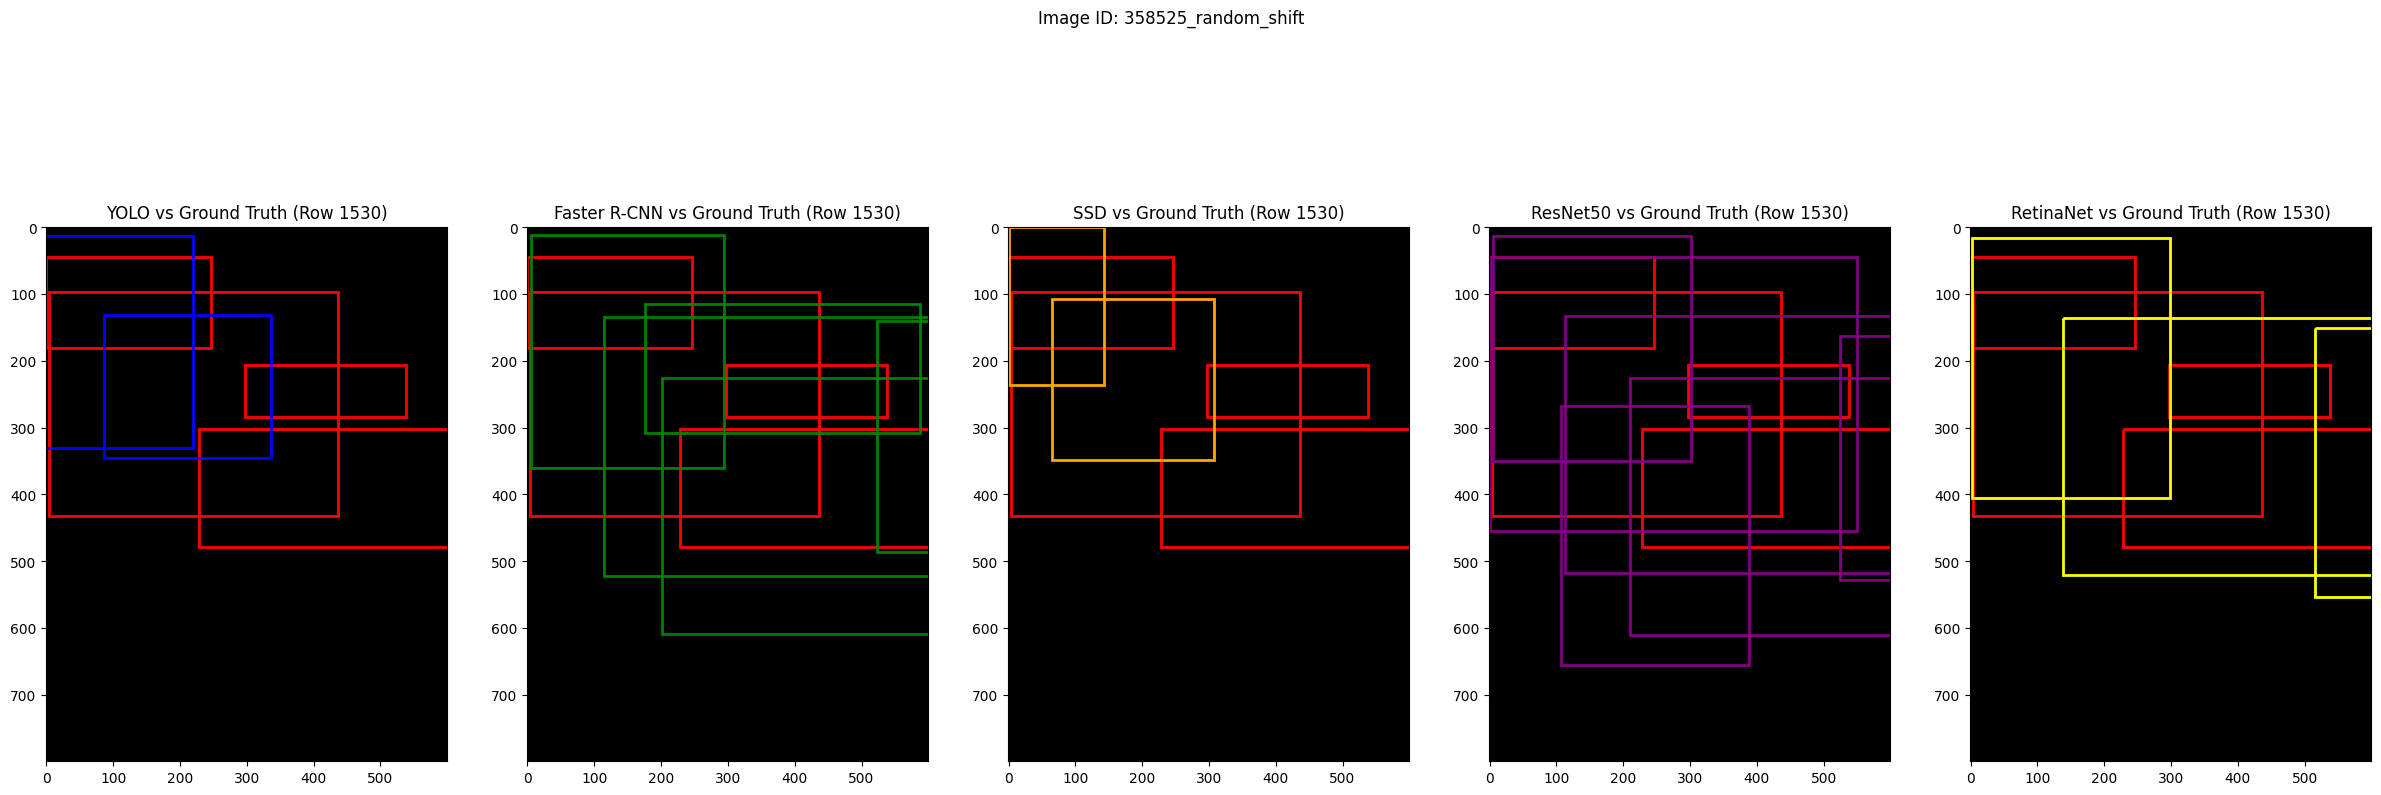

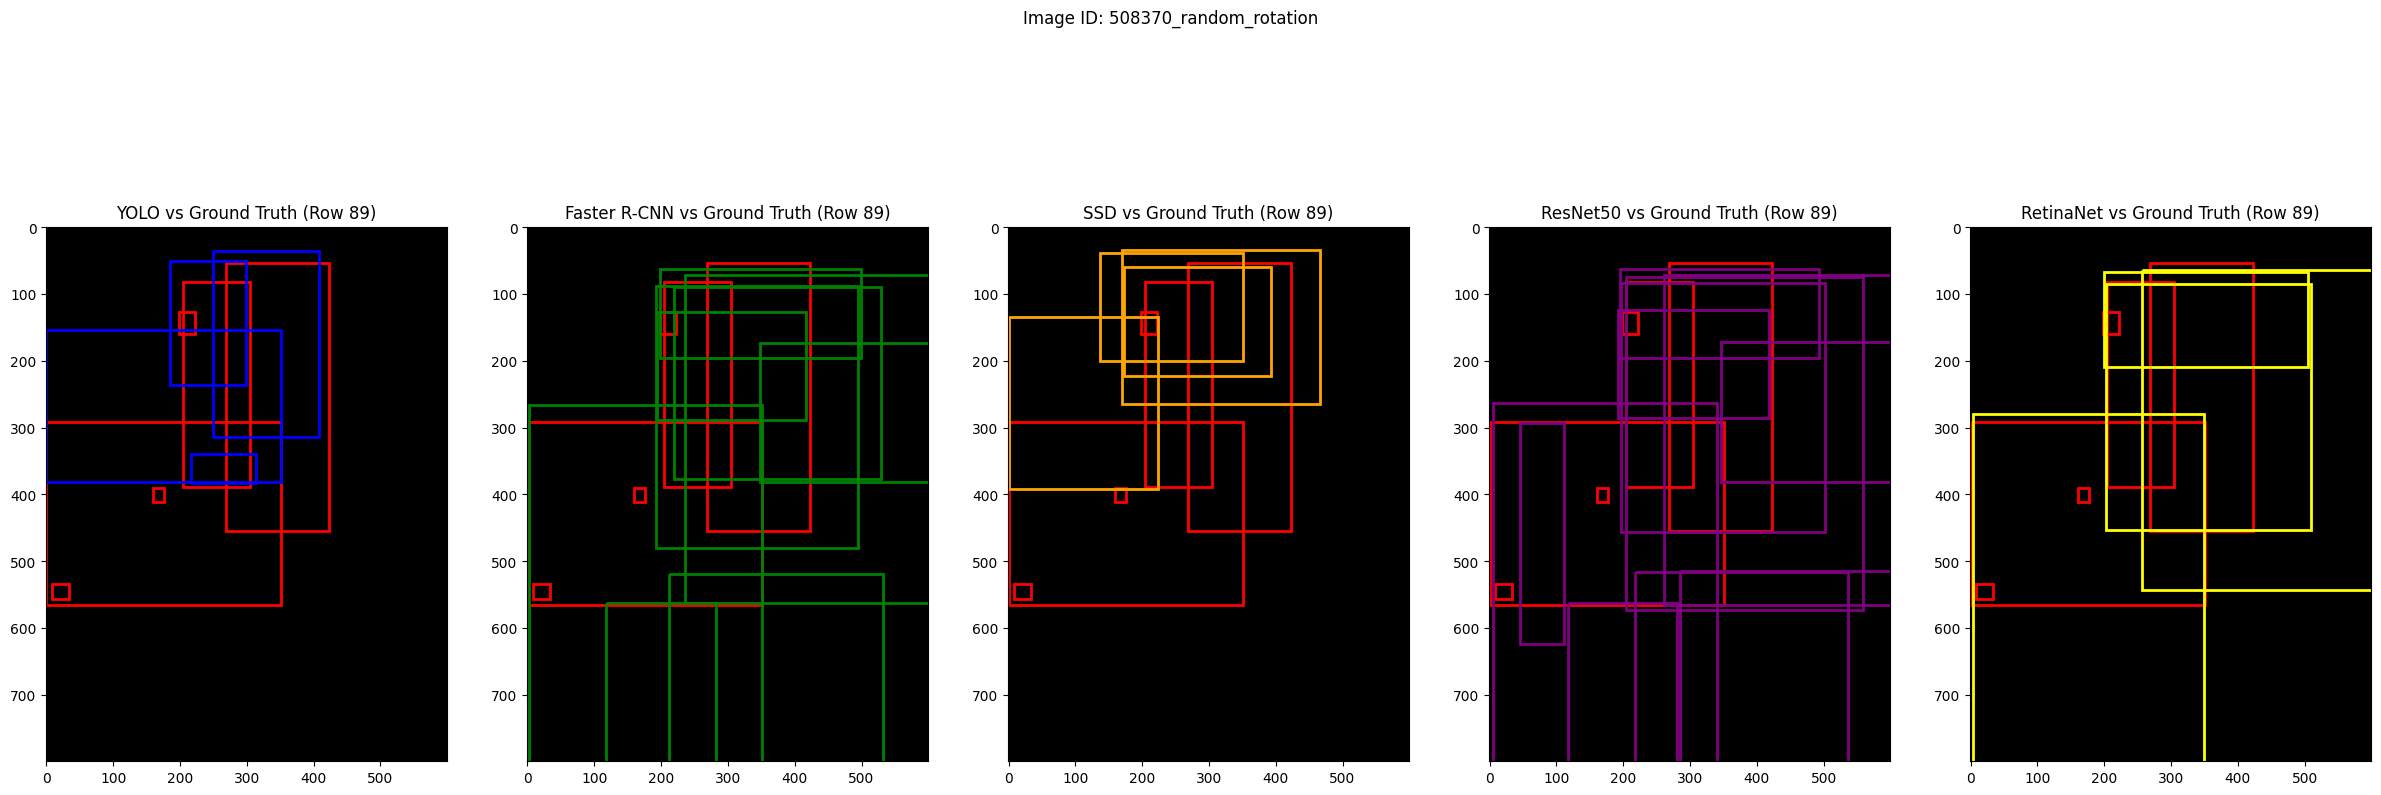

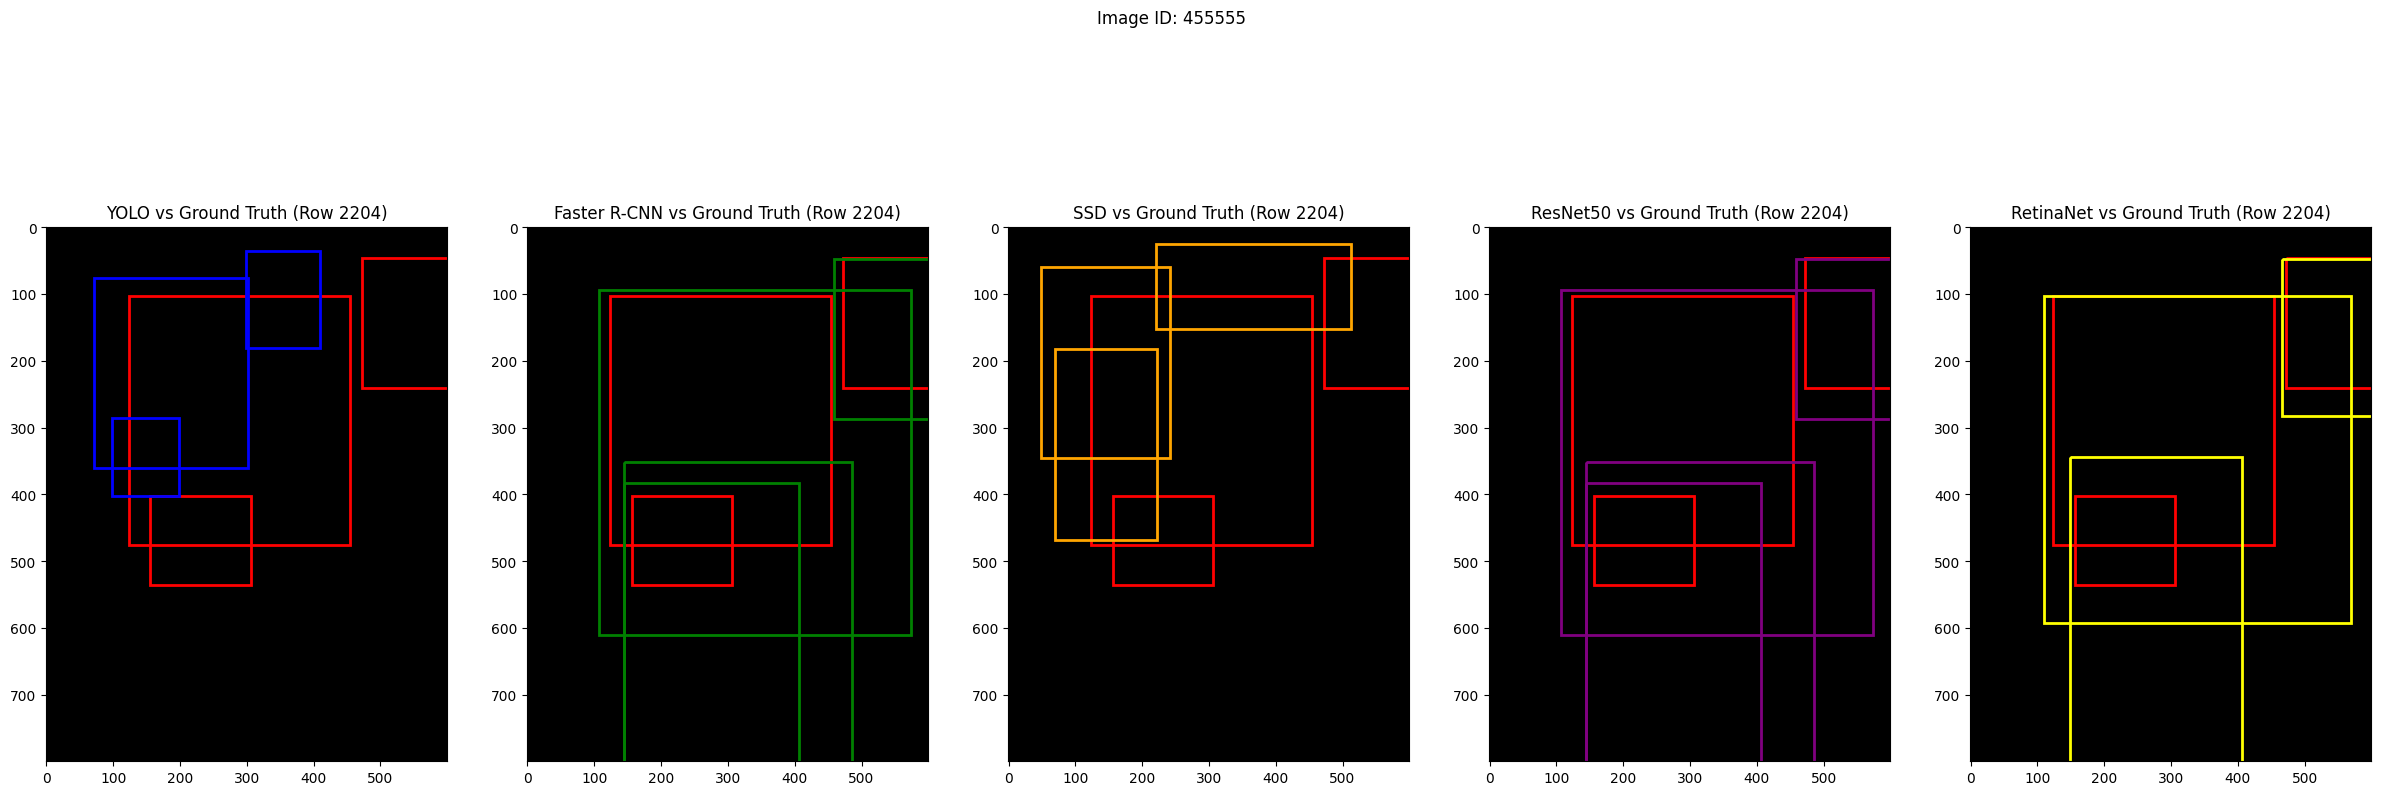

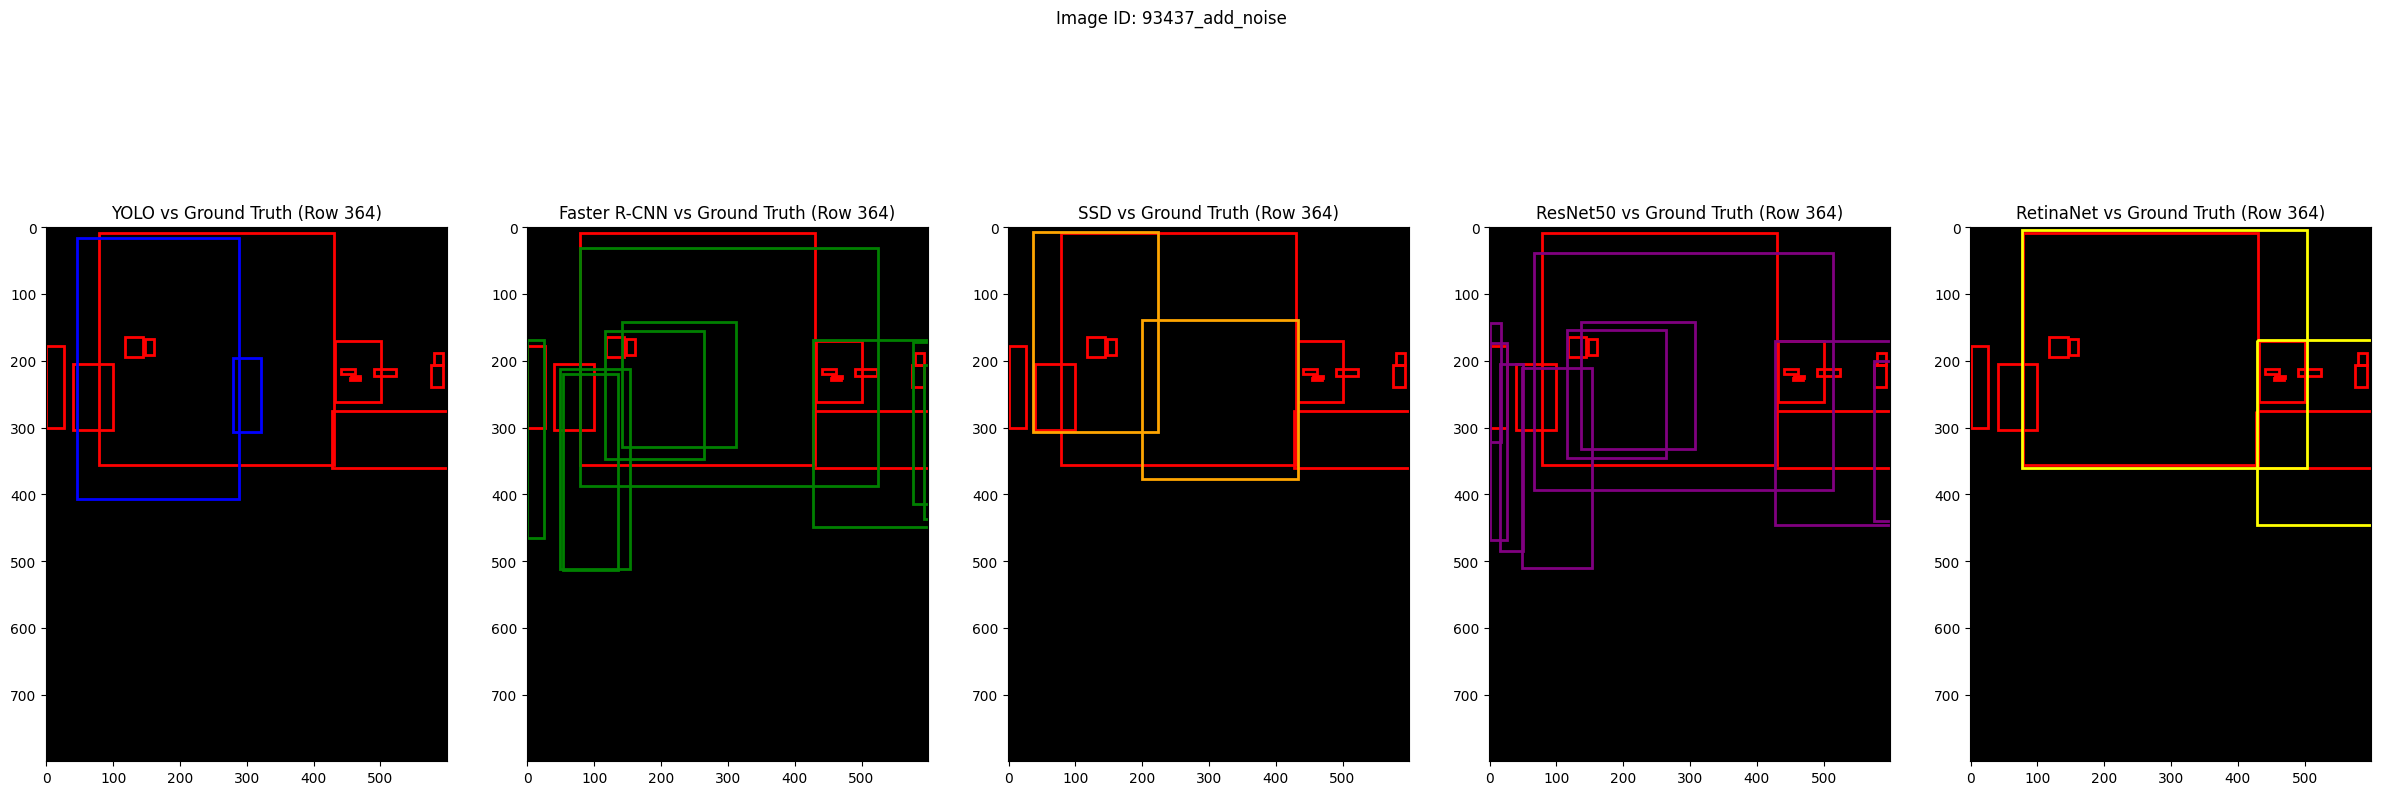

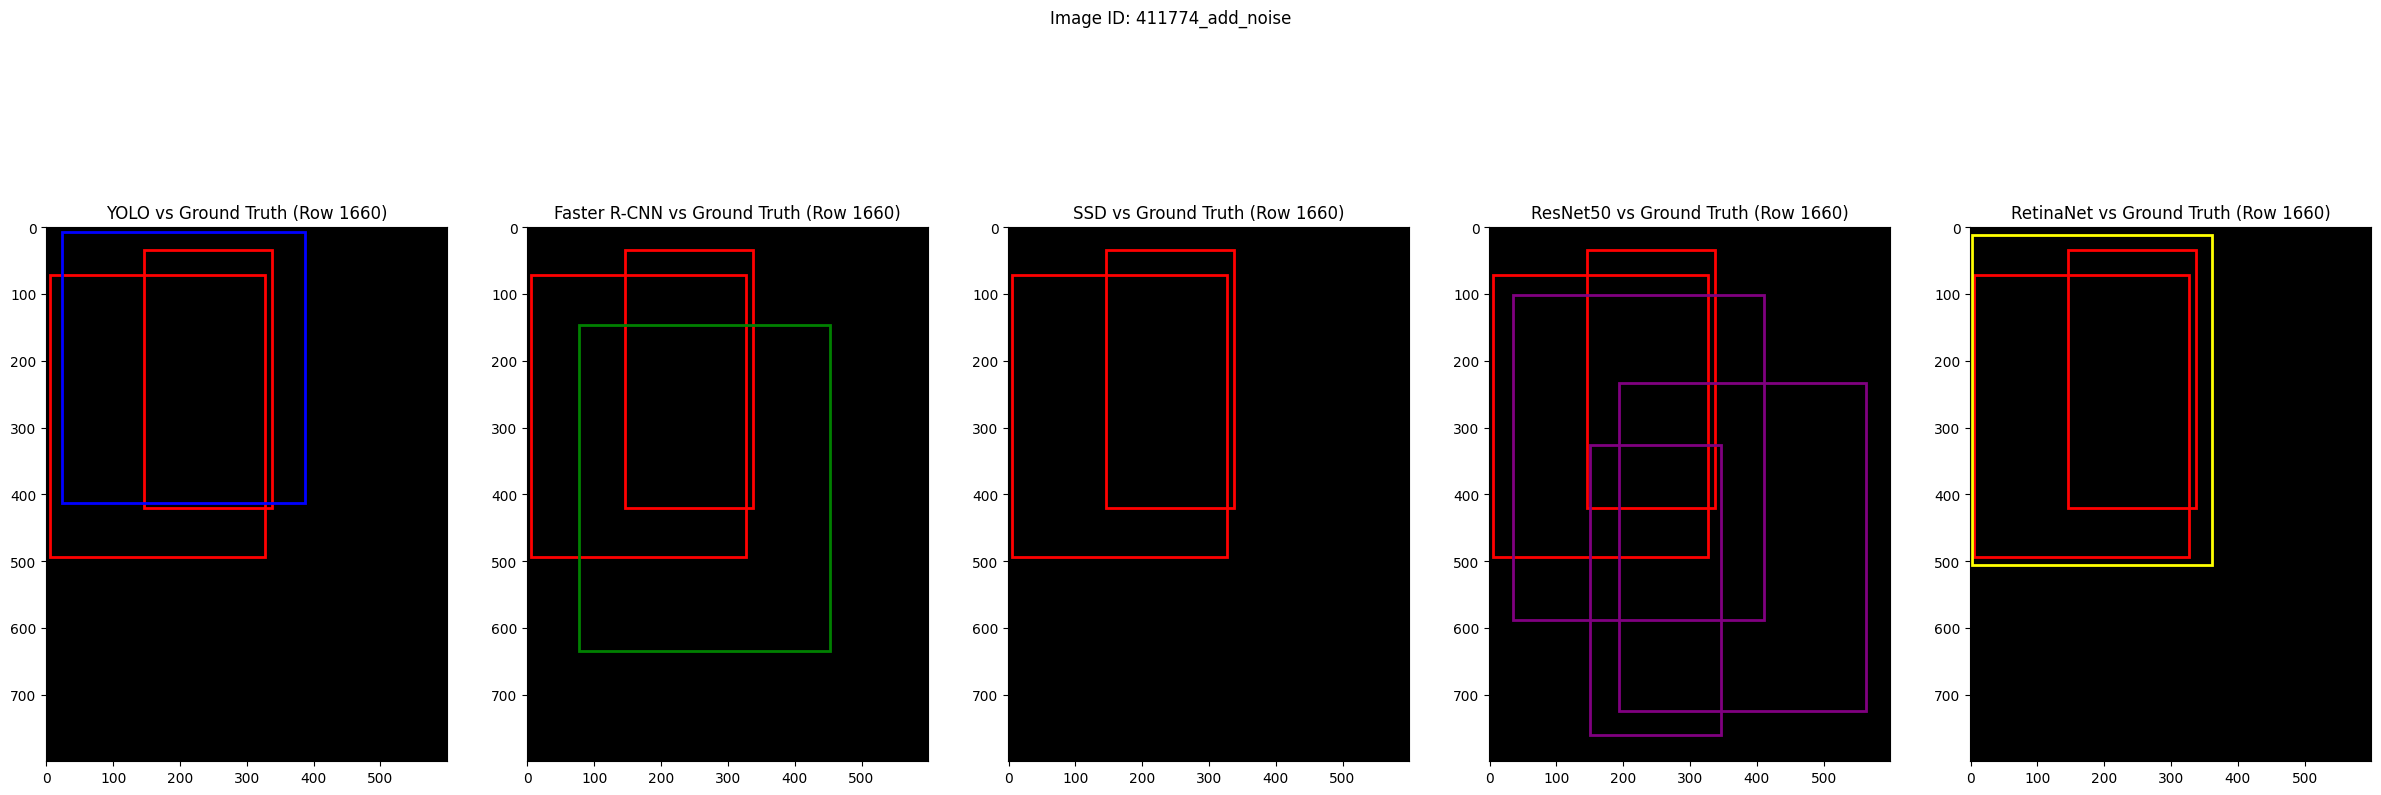

In [ ]:
# Assuming 'plot_boxes' is a function that can plot bounding boxes on a given axis `ax`
def plot_boxes(boxes, ax, color='r'):
    """
    Plot boxes on the provided axis (ax) with the specified color.
    """
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        rect = plt.Rectangle(
            (x_min, y_min), x_max - x_min, y_max - y_min,
            linewidth=2, edgecolor=color, facecolor='none'
        )
        ax.add_patch(rect)

# Function to plot YOLO, R-CNN, and SSD bounding boxes against Original for 5 rows
def plot_random_bboxes(objects_df, num_rows=5):
    """
    Plot Bounding Boxes comparison:
    1. YOLO vs Original
    2. R-CNN vs Original
    3. SSD vs Original
    for num_rows random rows.
    """
    # Sample 5 random rows from the dataframe
    sample_indices = random.sample(range(len(objects_df)), num_rows)

    # Loop through the randomly sampled rows
    for idx in sample_indices:
        # Create a figure with 5 subplots: YOLO, R-CNN, SSD, ResNet50, RetinaNet comparisons
        fig, axes = plt.subplots(1, 5, figsize=(30, 10))

        # Example image (use the actual dimensions for your case)
        img = np.zeros((800, 600, 3), dtype=np.uint8)  # Replace with actual image size if available

        # Extract bounding boxes
        bounding_boxes = objects_df.iloc[idx]['Bounding Boxes']
        yolo_boxes = objects_df.iloc[idx]['YOLO Boxes']
        faster_rcnn_boxes = objects_df.iloc[idx]['Faster R-CNN Boxes']
        ssd_boxes = objects_df.iloc[idx]['SSD Boxes']
        resnet50_boxes = objects_df.iloc[idx]['ResNet50 Boxes']
        retinanet_boxes = objects_df.iloc[idx]['RetinaNet Boxes']

        # Plot YOLO vs Original
        axes[0].imshow(img)
        plot_boxes(bounding_boxes, axes[0], color='red')  # Red: Original Bounding Boxes
        plot_boxes(yolo_boxes, axes[0], color='blue')     # Blue: YOLO Boxes
        axes[0].set_title(f"YOLO vs Ground Truth (Row {idx})")

        # Plot Faster R-CNN vs Original
        axes[1].imshow(img)
        plot_boxes(bounding_boxes, axes[1], color='red')  # Red: Original Bounding Boxes
        plot_boxes(faster_rcnn_boxes, axes[1], color='green')  # Green: R-CNN Boxes
        axes[1].set_title(f"Faster R-CNN vs Ground Truth (Row {idx})")

        # Plot SSD vs Original
        axes[2].imshow(img)
        plot_boxes(bounding_boxes, axes[2], color='red')  # Red: Original Bounding Boxes
        plot_boxes(ssd_boxes, axes[2], color='orange')    # Orange: SSD Boxes
        axes[2].set_title(f"SSD vs Ground Truth (Row {idx})")

        # Plot ResNet50 vs Original
        axes[3].imshow(img)
        plot_boxes(bounding_boxes, axes[3], color='red')  # Red: Original Bounding Boxes
        plot_boxes(resnet50_boxes, axes[3], color='purple')    # Purple: ResNet50 Boxes
        axes[3].set_title(f"ResNet50 vs Ground Truth (Row {idx})")

        # Plot RetinaNet vs Original
        axes[4].imshow(img)
        plot_boxes(bounding_boxes, axes[4], color='red')  # Red: Original Bounding Boxes
        plot_boxes(retinanet_boxes, axes[4], color='yellow')    # Yellow: RetinaNet Boxes
        axes[4].set_title(f"RetinaNet vs Ground Truth (Row {idx})")

        # Show the plots
        plt.suptitle(f"Image ID: {objects_df.iloc[idx]['ImageId']}")
        plt.show()

# Now call the function using your dataframe (replace 'objects_df' with your actual dataframe)
plot_random_bboxes(objects_df)
